In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
import bs4 as bs
import requests
from IPython.display import clear_output
from scipy.stats import mstats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import pickle
import os
from sklearn.model_selection import GridSearchCV
sns.set()



#Obtain list of S&100 companies from wikipedia
resp = requests.get("https://en.wikipedia.org/wiki/S%26P_100")
convert_soup = bs.BeautifulSoup(resp.text, 'lxml')
table = convert_soup.find('table',{'class':'wikitable sortable'})

tickers = []

for rows in table.findAll('tr')[1:]:
    ticker = rows.findAll('td')[0].text.strip()
    tickers.append(ticker)

all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []

#Extract data from Yahoo Finance
for i in tickers:
    try:
        print(i)
        test_data = pdr.get_data_yahoo(i, start = dt.datetime(1990,1,1), end = dt.date.today())
        test_data['symbol'] = i
        all_data = all_data.append(test_data)
        clear_output(wait = True)
    except:
        no_data.append(i)

    clear_output(wait = True)

XOM


In [2]:
def fetch_stock_data(ticker, start_date, end_date, save_to_csv=False):
    try:
        # Fetch data using yfinance
        data = yf.download(ticker, start=start_date, end=end_date)

        # Display the first few rows of the data
        print(data.head())

        # Save to CSV if needed
        if save_to_csv:
            filename = f"{ticker}_data.csv"
            data.to_csv(filename)
            print(f"Data saved to {filename}")

        return data

    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

In [3]:
import yfinance as yf
all_data = pd.DataFrame()  # Initialize an empty DataFrame
no_data = []  # To keep track of tickers with no data

# Set date range
start_date = "2004-01-01"
end_date = dt.date.today().strftime("%Y-%m-%d")

# Fetch data using yfinance
for ticker in tickers:
    df = fetch_stock_data(ticker, start_date, end_date, save_to_csv=False)
    if df.empty:  # Check if no data is returned for a ticker
        no_data.append(ticker)
        continue
    
    df.columns = df.columns.droplevel(1)  # Drop multi-level column headers (if any)
    df.reset_index(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is in datetime format
    df['symbol'] = ticker  # Add a column to store the symbol for each row
    
    # Append the data to the main DataFrame
    all_data = pd.concat([all_data, df], axis=0)

# Final reset of index after concatenation
all_data.reset_index(drop=True, inplace=True)


[*********************100%***********************]  1 of 1 completed


Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2004-01-02  0.320548  0.380000  0.388393  0.378214  0.384821  144642400
2004-01-05  0.333954  0.395893  0.399821  0.382500  0.382500  395018400
2004-01-06  0.332749  0.394464  0.400357  0.387679  0.397321  509348000
2004-01-07  0.340281  0.403393  0.407679  0.391607  0.394643  586874400
2004-01-08  0.351880  0.417143  0.423750  0.404464  0.407857  460303200


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker           ABBV       ABBV       ABBV       ABBV       ABBV      ABBV
Date                                                                       
2013-01-02  21.629173  35.119999  35.400002  34.099998  34.919998  13767900
2013-01-03  21.450579  34.830002  35.000000  34.160000  35.000000  16739300
2013-01-04  21.179592  34.389999  34.889999  34.250000  34.619999  21372100
2013-01-07  21.222708  34.459999  35.450001  34.150002  34.150002  17897100
2013-01-08  20.760805  33.709999  34.639999  33.360001  34.290001  17863300


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            ABT        ABT        ABT        ABT        ABT       ABT
Date                                                                       
2004-01-02  11.989448  20.986116  21.165676  20.802067  20.918781   6894172
2004-01-05  11.989448  20.986116  21.210567  20.739222  21.143230  14395828
2004-01-06  11.902254  20.833490  20.959183  20.721266  20.851446   7790584
2004-01-07  12.027920  21.053452  21.053452  20.716776  20.851446   7774322
2004-01-08  11.674001  20.433968  20.447435  20.249920  20.424990  17053876


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High    Low   Open   Volume
Ticker            ACN        ACN        ACN    ACN    ACN      ACN
Date                                                              
2004-01-02  18.375956  25.920000  26.950001  25.67  26.15  1560900
2004-01-05  18.900574  26.660000  26.780001  26.01  26.01  1971300
2004-01-06  18.680805  26.350000  26.549999  26.10  26.41  2054400
2004-01-07  18.255428  25.750000  26.490000  25.60  26.40  2678700
2004-01-08  17.645733  24.889999  26.000000  24.60  25.98  5382400


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker           ADBE       ADBE       ADBE       ADBE       ADBE      ADBE
Date                                                                       
2004-01-02  19.518398  19.549999  19.850000  19.434999  19.820000   3699600
2004-01-05  19.867832  19.900000  19.990000  19.230000  19.650000   9367400
2004-01-06  19.887800  19.920000  19.990000  19.570000  19.920000   5390400
2004-01-07  19.694550  19.719999  19.850000  19.555000  19.719999   5457800
2004-01-08  18.975481  19.000000  19.940001  18.950001  19.705000  13034800


[*********************100%***********************]  1 of 1 completed


Price        Adj Close        Close         High          Low    Open  Volume
Ticker             AIG          AIG          AIG          AIG     AIG     AIG
Date                                                                         
2004-01-02  812.396851  1335.800049  1347.000000  1327.599976  1330.0  224715
2004-01-05  824.924805  1356.400024  1357.400024  1340.000000  1346.0  263580
2004-01-06  822.978516  1353.199951  1356.400024  1340.400024  1356.0  231440
2004-01-07  833.074219  1369.800049  1370.000000  1344.800049  1348.0  319915
2004-01-08  840.372375  1381.800049  1382.000000  1367.800049  1372.0  284575


[*********************100%***********************]  1 of 1 completed


Price      Adj Close  Close   High    Low   Open    Volume
Ticker           AMD    AMD    AMD    AMD    AMD       AMD
Date                                                      
2004-01-02     14.86  14.86  15.11  14.77  15.10   8220700
2004-01-05     15.20  15.20  15.27  15.01  15.05   9156000
2004-01-06     15.61  15.61  15.82  15.05  15.21  14592200
2004-01-07     15.66  15.66  15.99  15.49  15.78  15329300
2004-01-08     15.93  15.93  16.00  15.59  15.95  11764600


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker           AMGN       AMGN       AMGN       AMGN       AMGN     AMGN
Date                                                                      
2004-01-02  43.847328  62.349998  62.799999  62.029999  62.070000  5933300
2004-01-05  43.847328  62.349998  62.820000  61.869999  62.759998  7671200
2004-01-06  43.987957  62.549999  63.200001  62.150002  62.349998  8716300
2004-01-07  44.571651  63.380001  63.500000  62.400002  62.480000  9168800
2004-01-08  44.557590  63.360001  63.900002  62.790001  63.630001  9122700


[*********************100%***********************]  1 of 1 completed


Price      Adj Close  Close   High    Low   Open   Volume
Ticker           AMT    AMT    AMT    AMT    AMT      AMT
Date                                                     
2004-01-02  8.376281  10.97  11.05  10.80  10.85  1413200
2004-01-05  8.574804  11.23  11.30  10.95  11.05  1963200
2004-01-06  8.765696  11.48  11.48  11.16  11.23  2076800
2004-01-07  8.918407  11.68  11.90  11.08  11.48  3908500
2004-01-08  9.819413  12.86  13.00  11.75  11.75  9087100


[*********************100%***********************]  1 of 1 completed


Price      Adj Close   Close    High     Low    Open     Volume
Ticker          AMZN    AMZN    AMZN    AMZN    AMZN       AMZN
Date                                                           
2004-01-02    2.5950  2.5950  2.6565  2.5715  2.6380  132798000
2004-01-05    2.6635  2.6635  2.6800  2.5685  2.6000  225682000
2004-01-06    2.6515  2.6515  2.6750  2.6370  2.6555  119710000
2004-01-07    2.5950  2.5950  2.6330  2.5470  2.6090  184854000
2004-01-08    2.5120  2.5120  2.6050  2.5015  2.6045  206406000


[*********************100%***********************]  1 of 1 completed


Price      Adj Close  Close   High    Low   Open     Volume
Ticker          AVGO   AVGO   AVGO   AVGO   AVGO       AVGO
Date                                                       
2009-08-06  1.153155  1.618  1.691  1.556  1.650  241978000
2009-08-07  1.170973  1.643  1.676  1.603  1.615   24543000
2009-08-10  1.138189  1.597  1.663  1.561  1.663   24210000
2009-08-11  1.116808  1.567  1.600  1.550  1.598   23054000
2009-08-12  1.140326  1.600  1.620  1.566  1.615   14513000


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            AXP        AXP        AXP        AXP        AXP      AXP
Date                                                                      
2004-01-02  30.812239  41.795574  42.495815  41.778069  42.390778  3041586
2004-01-05  31.083250  42.163200  42.303249  41.856846  42.084423  4229407
2004-01-06  31.134871  42.233227  42.303249  41.953129  41.970634  4138924
2004-01-07  31.225214  42.355766  42.399532  42.084423  42.399532  4480635
2004-01-08  31.134871  42.233227  42.653370  41.839340  42.434544  6395407


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker             BA         BA         BA         BA         BA       BA
Date                                                                      
2004-01-02  28.913620  41.990002  42.700001  41.709999  42.500000  3146700
2004-01-05  28.968712  42.070000  42.580002  41.939999  42.200001  4115500
2004-01-06  28.872307  41.930000  42.000000  41.470001  42.000000  2515800
2004-01-07  29.113308  42.279999  42.650002  41.689999  41.930000  4219200
2004-01-08  29.512691  42.860001  43.139999  42.259998  42.500000  3114600


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            BAC        BAC        BAC        BAC        BAC       BAC
Date                                                                       
2004-01-02  24.298676  39.544998  40.215000  39.455002  39.875000  16897000
2004-01-05  24.369328  39.660000  39.799999  39.360001  39.660000  14535400
2004-01-06  24.329399  39.595001  39.695000  39.400002  39.560001  15083600
2004-01-07  24.274113  39.505001  39.584999  39.404999  39.525002  13346200
2004-01-08  24.286388  39.525002  39.570000  39.375000  39.505001  13774200


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker             BK         BK         BK         BK         BK       BK
Date                                                                      
2004-01-02  21.201466  34.778461  35.350861  34.693661  35.107059  1459440
2004-01-05  22.086750  36.230656  36.230656  35.085861  35.138859  2627558
2004-01-06  22.429224  36.792454  36.940853  36.061054  36.071655  2935766
2004-01-07  21.653797  35.520458  36.198856  34.958660  36.039856  5963514
2004-01-08  21.627949  35.478058  35.827858  35.085861  35.774857  3742751


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker           BKNG       BKNG       BKNG       BKNG       BKNG     BKNG
Date                                                                      
2004-01-02  18.614952  18.780001  18.799999  18.049999  18.049999  1273900
2004-01-05  19.457479  19.629999  19.629999  18.760000  18.950001   987300
2004-01-06  18.634775  18.799999  19.209999  18.700001  19.010000  1755600
2004-01-07  18.515829  18.680000  18.889999  18.110001  18.750000  1227800
2004-01-08  18.496004  18.660000  18.910000  18.450001  18.799999   854300


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open  Volume
Ticker            BLK        BLK        BLK        BLK        BLK     BLK
Date                                                                     
2004-01-02  33.245926  53.990002  54.049999  53.029999  53.150002   85500
2004-01-05  35.007046  56.849998  56.849998  54.000000  54.000000  101900
2004-01-06  35.253372  57.250000  57.669998  56.840000  56.849998  101500
2004-01-07  35.715210  58.000000  58.139999  57.160000  57.250000   77800
2004-01-08  35.696743  57.970001  58.150002  57.380001  58.150002   62400


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            BMY        BMY        BMY        BMY        BMY       BMY
Date                                                                       
2004-01-02  13.367413  29.350000  29.639999  28.809999  28.900000  10198300
2004-01-05  13.326423  29.260000  29.700001  28.830000  29.650000   9947800
2004-01-06  13.390184  29.400000  29.469999  28.900000  29.100000   6385100
2004-01-07  13.481272  29.600000  29.629999  29.070000  29.070000   6032100
2004-01-08  13.381081  29.379999  29.730000  29.230000  29.700001   6285700


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Empty DataFrame
Columns: [(Adj Close, BRK.B), (Close, BRK.B), (High, BRK.B), (Low, BRK.B), (Open, BRK.B), (Volume, BRK.B)]
Index: []


[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker               C           C           C           C           C   
Date                                                                     
2004-01-02  301.605255  490.000000  492.500000  485.399994  490.500000   
2004-01-05  306.467926  497.899994  498.000000  493.500000  494.799988   
2004-01-06  306.775726  498.399994  498.799988  495.100006  495.299988   
2004-01-07  307.206543  499.100006  501.700012  495.200012  498.100006   
2004-01-08  308.499176  501.200012  502.299988  497.000000  499.500000   

Price        Volume  
Ticker            C  
Date                 
2004-01-02  1395350  
2004-01-05  1461740  
2004-01-06  1077030  
2004-01-07  1204160  
2004-01-08  1341190  


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            CAT        CAT        CAT        CAT        CAT      CAT
Date                                                                      
2004-01-02  24.447844  41.325001  41.845001  41.259998  41.584999  4172800
2004-01-05  25.113392  42.450001  42.580002  41.855000  41.924999  6184200
2004-01-06  24.669697  41.700001  42.235001  41.599998  42.160000  6190400
2004-01-07  24.400507  41.244999  41.759998  41.154999  41.759998  6203200
2004-01-08  24.211182  40.924999  41.595001  40.875000  41.369999  4844400


[*********************100%***********************]  1 of 1 completed


Price      Adj Close Close       High   Low       Open Volume
Ticker          CHTR  CHTR       CHTR  CHTR       CHTR   CHTR
Date                                                         
2010-01-05      35.0  35.0  35.000000  35.0  35.000000  10000
2010-01-06      35.0  35.0  35.000000  35.0  35.000000      0
2010-01-07      35.0  35.0  35.500000  35.0  35.250000   9800
2010-01-08      33.5  33.5  34.549999  33.5  34.549999  32200
2010-01-11      33.5  33.5  33.500000  33.5  33.500000   3700


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low    Open    Volume
Ticker             CL         CL         CL         CL      CL        CL
Date                                                                    
2004-01-02  15.305989  24.809999  25.049999  24.709999  24.975   4031800
2004-01-05  15.438625  25.025000  25.040001  24.825001  24.910  10084600
2004-01-06  15.540417  25.190001  25.270000  24.934999  25.000   9328400
2004-01-07  15.623703  25.325001  25.385000  25.209999  25.250   8397800
2004-01-08  15.660721  25.385000  25.465000  25.260000  25.340   5105800


[*********************100%***********************]  1 of 1 completed


Price      Adj Close      Close       High        Low       Open    Volume
Ticker         CMCSA      CMCSA      CMCSA      CMCSA      CMCSA     CMCSA
Date                                                                      
2004-01-02  7.827521  10.986667  11.140000  10.880000  10.970000  17215800
2004-01-05  7.898765  11.086667  11.133333  10.900000  11.033333  22867800
2004-01-06  7.908265  11.100000  11.163333  10.900000  10.913333  20053500
2004-01-07  8.119625  11.396667  11.430000  11.006667  11.066667  24715800
2004-01-08  8.309615  11.663333  11.663333  11.300000  11.376667  23189400


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            COF        COF        COF        COF        COF      COF
Date                                                                      
2004-01-02  44.731789  60.230000  61.599998  60.040001  61.330002  1343400
2004-01-05  46.417694  62.500000  63.020000  60.250000  61.599998  2980400
2004-01-06  47.316326  63.709999  63.860001  62.119999  62.450001  3338100
2004-01-07  47.464874  63.910000  63.950001  63.250000  63.630001  2430200
2004-01-08  48.148136  64.830002  64.959999  63.680000  64.000000  3628000


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            COP        COP        COP        COP        COP      COP
Date                                                                      
2004-01-02  12.650411  24.958244  25.076403  24.908693  24.954433  4928399
2004-01-05  12.992365  25.632895  25.785358  25.179316  25.186939  9056080
2004-01-06  12.851329  25.354649  25.529982  25.278418  25.442314  7268372
2004-01-07  12.783707  25.221243  25.423258  24.870579  25.156446  7965195
2004-01-08  12.712228  25.080215  25.183126  24.679998  24.679998  6570236


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker           COST       COST       COST       COST       COST     COST
Date                                                                      
2004-01-02  24.391235  36.320000  37.419998  36.180000  37.189999  2603100
2004-01-05  24.277069  36.150002  36.610001  35.860001  36.439999  3968300
2004-01-06  24.552410  36.560001  36.930000  36.060001  36.099998  3124300
2004-01-07  24.901611  37.080002  37.180000  36.520000  36.580002  3467100
2004-01-08  25.022499  37.259998  37.529999  37.020000  37.400002  4973100


[*********************100%***********************]  1 of 1 completed


Price      Adj Close Close    High     Low    Open    Volume
Ticker           CRM   CRM     CRM     CRM     CRM       CRM
Date                                                        
2004-06-23  4.276116  4.30  4.3250  3.6875  3.7500  43574400
2004-06-24  4.166728  4.19  4.4225  4.1250  4.3875   8887200
2004-06-25  3.928060  3.95  4.1875  3.9475  4.1275   6710000
2004-06-28  3.977782  4.00  4.0525  3.8600  4.0000   2270800
2004-06-29  4.077227  4.10  4.1750  3.9575  4.0000   2112000


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker           CSCO       CSCO       CSCO       CSCO       CSCO      CSCO
Date                                                                       
2004-01-02  16.181765  24.250000  24.530001  24.160000  24.360001  29955800
2004-01-05  16.528757  24.770000  24.840000  24.379999  24.400000  38892100
2004-01-06  16.722269  25.059999  25.100000  24.750000  24.830000  43684400
2004-01-07  17.055910  25.559999  25.730000  24.850000  25.170000  48757500
2004-01-08  17.576399  26.340000  26.549999  25.480000  25.840000  61683300


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            CVS        CVS        CVS        CVS        CVS      CVS
Date                                                                      
2004-01-02  12.220123  17.885000  18.295000  17.815001  18.145000  2869400
2004-01-05  12.295285  17.995001  18.190001  17.799999  18.049999  4176800
2004-01-06  12.322616  18.035000  18.209999  17.885000  17.995001  3281800
2004-01-07  12.162045  17.799999  17.875000  17.459999  17.625000  5673600
2004-01-08  12.271368  17.959999  18.055000  17.725000  17.750000  4388400


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            CVX        CVX        CVX        CVX        CVX      CVX
Date                                                                      
2004-01-02  19.569180  42.945000  43.474998  42.759998  43.240002  4864400
2004-01-05  19.947397  43.775002  43.820000  43.224998  43.275002  4926400
2004-01-06  19.838041  43.535000  43.639999  43.099998  43.310001  7413600
2004-01-07  19.585133  42.980000  43.430000  42.730000  43.424999  8500200
2004-01-08  19.605646  43.025002  43.025002  42.544998  42.750000  6397400


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker             DE         DE         DE         DE         DE       DE
Date                                                                      
2004-01-02  21.479891  32.150002  32.625000  32.075001  32.474998  2742600
2004-01-05  21.509958  32.195000  32.590000  31.844999  32.474998  4821800
2004-01-06  20.911995  31.299999  32.174999  31.174999  32.174999  6572600
2004-01-07  21.446493  32.099998  32.325001  31.344999  31.344999  7934800
2004-01-08  21.292820  31.870001  32.474998  31.725000  32.474998  3325000


[*********************100%***********************]  1 of 1 completed


Price      Adj Close      Close       High        Low       Open   Volume
Ticker           DHR        DHR        DHR        DHR        DHR      DHR
Date                                                                     
2004-01-02  9.137854  15.243657  15.485619  15.188207  15.433530  4508131
2004-01-05  9.126770  15.225173  15.357917  15.102512  15.265500  6971981
2004-01-06  9.014966  15.038660  15.173084  15.005054  15.063865  7548069
2004-01-07  8.984746  14.988251  15.057144  14.870631  15.038660  7355246
2004-01-08  8.972659  14.968088  14.991612  14.747969  14.988251  8964485


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            DIS        DIS        DIS        DIS        DIS       DIS
Date                                                                       
2004-01-02  18.815582  23.350454  23.597080  23.143290  23.172886   6756006
2004-01-05  19.189192  23.814110  23.873301  23.291265  23.350454  10508667
2004-01-06  19.236889  23.873301  23.942354  23.676001  23.676001   9587937
2004-01-07  19.554857  24.267900  24.307360  23.932489  24.149521   9880791
2004-01-08  19.841022  24.623039  24.642771  24.218575  24.267900   9703092


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            DOW        DOW        DOW        DOW        DOW      DOW
Date                                                                      
2019-03-20  36.684483  49.799999  53.500000  49.500000  52.750000  2350800
2019-03-21  36.080448  48.980000  50.000000  48.200001  49.990002  1764700
2019-03-22  35.800514  48.599998  49.950001  48.160000  48.799999   844700
2019-03-25  36.205673  49.150002  49.400002  48.000000  48.599998   440900
2019-03-26  35.984680  48.849998  49.750000  48.180000  49.000000   504700


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            DUK        DUK        DUK        DUK        DUK       DUK
Date                                                                       
2004-01-02  13.501969  35.476154  36.068878  35.371555  35.911980   2021454
2004-01-05  13.482059  35.423855  35.633053  34.621937  35.476154   2689153
2004-01-06  13.289654  34.918301  35.336693  34.674236  35.336693   4886422
2004-01-07  14.065931  36.957958  37.498383  36.609299  36.783630  12403029
2004-01-08  13.840346  36.365238  36.801064  36.086311  36.783630   5502495


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            EMR        EMR        EMR        EMR        EMR      EMR
Date                                                                      
2004-01-02  18.227053  32.410000  32.645000  32.250000  32.375000  2038800
2004-01-05  18.452007  32.810001  32.814999  32.474998  32.525002  2310800
2004-01-06  18.488564  32.875000  32.965000  32.650002  32.810001  1843400
2004-01-07  18.558863  33.000000  33.000000  32.630001  32.880001  2025400
2004-01-08  18.646034  33.154999  33.215000  32.900002  33.000000  1970600


[*********************100%***********************]  1 of 1 completed


Price      Adj Close      Close   High        Low       Open    Volume
Ticker             F          F      F          F          F         F
Date                                                                  
2004-01-02  8.040539  16.080000  16.15  16.030001  16.100000   9030400
2004-01-05  8.295558  16.590000  16.65  16.330000  16.370001  20069800
2004-01-06  8.270554  16.540001  16.73  16.389999  16.719999  16760800
2004-01-07  8.495570  16.990000  17.02  16.450001  16.580000  13801900
2004-01-08  8.550574  17.100000  17.34  17.000000  17.150000  15805300


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            FDX        FDX        FDX        FDX        FDX      FDX
Date                                                                      
2004-01-02  55.994186  67.889999  68.620003  67.540001  67.699997  1398300
2004-01-05  56.043678  67.949997  68.589996  67.800003  68.400002  3520700
2004-01-06  55.754997  67.599998  68.010002  67.540001  67.959999  3129300
2004-01-07  55.202396  66.930000  67.739998  66.680000  67.599998  3475500
2004-01-08  54.748772  66.379997  67.220001  65.900002  66.970001  3543200


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker             GD         GD         GD         GD         GD       GD
Date                                                                      
2004-01-02  28.521000  44.830002  45.090000  44.505001  45.020000  1099200
2004-01-05  28.435118  44.695000  45.084999  44.375000  44.855000  1861400
2004-01-06  28.342867  44.549999  44.695000  44.250000  44.375000  1138200
2004-01-07  28.947247  45.500000  45.825001  44.689999  44.900002  3459000
2004-01-08  29.437141  46.270000  46.334999  45.099998  45.740002  2380600


[*********************100%***********************]  1 of 1 completed


Price       Adj Close       Close        High         Low        Open   Volume
Ticker             GE          GE          GE          GE          GE       GE
Date                                                                          
2004-01-02  88.001709  149.140656  151.345169  148.182159  148.565552  3826550
2004-01-05  89.302528  151.345169  151.345169  149.092728  149.715744  4089547
2004-01-06  88.708679  150.338760  151.105545  149.524048  150.578384  3435413
2004-01-07  89.585289  151.824417  151.824417  149.332352  150.242905  3875606
2004-01-08  91.197136  154.556107  154.556107  151.776489  152.687057  5636130


[*********************100%***********************]  1 of 1 completed


Price      Adj Close   Close     High      Low     Open    Volume
Ticker          GILD    GILD     GILD     GILD     GILD      GILD
Date                                                             
2004-01-02  5.179548  7.2525  7.40500  7.24875  7.29875  21652000
2004-01-05  5.192045  7.2700  7.35125  7.25000  7.26125  20797600
2004-01-06  5.172407  7.2425  7.32625  7.20750  7.22500  16619200
2004-01-07  5.565203  7.7925  7.80375  7.23250  7.30875  47675200
2004-01-08  5.475931  7.6675  7.83625  7.55250  7.83375  38496800


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open     Volume
Ticker             GM         GM         GM         GM         GM         GM
Date                                                                        
2010-11-18  25.759945  34.189999  35.990002  33.889999  35.000000  457044300
2010-11-19  25.812681  34.259998  34.500000  33.110001  34.150002  107842000
2010-11-22  25.677063  34.080002  34.480000  33.810001  34.200001   36650600
2010-11-23  25.051714  33.250000  33.990002  33.189999  33.950001   31170200
2010-11-24  25.225004  33.480000  33.799999  33.220001  33.730000   26138000


[*********************100%***********************]  1 of 1 completed


Price      Adj Close     Close      High       Low      Open     Volume
Ticker          GOOG      GOOG      GOOG      GOOG      GOOG       GOOG
Date                                                                   
2004-08-19  2.490186  2.499133  2.591785  2.390042  2.490664  897427216
2004-08-20  2.687981  2.697639  2.716817  2.503118  2.515820  458857488
2004-08-23  2.715032  2.724787  2.826406  2.716070  2.758411  366857939
2004-08-24  2.602609  2.611960  2.779581  2.579581  2.770615  306396159
2004-08-25  2.630652  2.640104  2.689918  2.587302  2.614201  184645512


[*********************100%***********************]  1 of 1 completed


Price      Adj Close     Close      High       Low      Open     Volume
Ticker         GOOGL     GOOGL     GOOGL     GOOGL     GOOGL      GOOGL
Date                                                                   
2004-08-19  2.501941  2.511011  2.604104  2.401401  2.502503  893181924
2004-08-20  2.700670  2.710460  2.729730  2.515015  2.527778  456686856
2004-08-23  2.727849  2.737738  2.839840  2.728979  2.771522  365122512
2004-08-24  2.614895  2.624374  2.792793  2.591842  2.783784  304946748
2004-08-25  2.643072  2.652653  2.702703  2.599600  2.626627  183772044


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker             GS         GS         GS         GS         GS       GS
Date                                                                      
2004-01-02  70.771935  97.129997  99.089996  96.580002  98.800003  3042300
2004-01-05  70.808357  97.180000  97.940002  96.150002  97.300003  4817700
2004-01-06  70.385765  96.599998  97.669998  96.379997  97.360001  4077800
2004-01-07  71.864891  98.629997  98.860001  96.449997  96.760002  4457800
2004-01-08  71.952293  98.750000  98.980003  97.699997  98.730003  3687800


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker             HD         HD         HD         HD         HD        HD
Date                                                                       
2004-01-02  21.364630  35.020000  35.939999  34.810001  35.750000   7177600
2004-01-05  21.370729  35.029999  35.250000  34.810001  35.070000  11405100
2004-01-06  21.602556  35.410000  35.549999  34.840000  35.090000   8845200
2004-01-07  21.901499  35.900002  36.090000  35.360001  35.439999   9236900
2004-01-08  21.718472  35.599998  35.980000  35.169998  35.889999  10918400


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            HON        HON        HON        HON        HON      HON
Date                                                                      
2004-01-02  19.913406  31.775806  32.223888  31.318190  31.508863  3625667
2004-01-05  20.014980  31.937880  32.204823  31.508863  31.604200  5276233
2004-01-06  20.271887  32.347828  32.424099  31.670937  31.670937  3535460
2004-01-07  20.152399  32.157154  32.586170  32.042751  32.319225  6442413
2004-01-08  21.120287  33.701614  33.787415  33.081921  33.606277  8090147


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            IBM        IBM        IBM        IBM        IBM      IBM
Date                                                                      
2004-01-02  48.009647  87.523903  88.957932  87.189293  88.776291  5572879
2004-01-05  48.796253  88.957932  88.996178  87.954109  87.954109  5519010
2004-01-06  48.801502  88.967499  89.091782  88.087952  88.145317  4581480
2004-01-07  48.654667  88.699806  89.273422  88.403442  89.043976  5154270
2004-01-08  48.791023  88.948372  89.110901  87.982796  89.110901  6464071


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker           INTC       INTC       INTC       INTC       INTC      INTC
Date                                                                       
2004-01-02  18.473755  32.160000  32.599998  32.029999  32.360001  37343200
2004-01-05  18.904575  32.910000  32.970001  32.400002  32.520000  42611900
2004-01-06  18.898838  32.900002  33.000000  32.619999  32.919998  38007600
2004-01-07  19.524969  33.990002  34.000000  33.220001  33.330002  63665000
2004-01-08  19.668583  34.240002  34.349998  33.900002  34.169998  50596000


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker           INTU       INTU       INTU       INTU       INTU      INTU
Date                                                                       
2004-01-02  23.224293  26.139999  26.635000  26.090000  26.415001   4653400
2004-01-05  23.188759  26.100000  26.344999  26.030001  26.250000   4698600
2004-01-06  22.393583  25.205000  25.645000  24.920000  25.570000  13325000
2004-01-07  21.851627  24.594999  25.165001  24.375000  25.129999  10156800
2004-01-08  21.318554  23.995001  24.750000  23.865000  24.655001  10183600


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            JNJ        JNJ        JNJ        JNJ        JNJ      JNJ
Date                                                                      
2004-01-02  28.668581  51.660000  52.090000  51.400002  51.660000  6463600
2004-01-05  28.835083  51.959999  52.080002  51.500000  52.000000  8433800
2004-01-06  28.707434  51.730000  52.090000  51.549999  51.709999  7298000
2004-01-07  28.718531  51.750000  51.779999  51.459999  51.650002  7279200
2004-01-08  28.851719  51.990002  51.990002  51.500000  51.750000  6464900


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            JPM        JPM        JPM        JPM        JPM       JPM
Date                                                                       
2004-01-02  20.831476  36.619999  37.070000  36.529999  36.560001   9280500
2004-01-05  20.791660  36.549999  36.860001  36.299999  36.660000   9715400
2004-01-06  21.315001  37.470001  37.570000  37.090000  37.150002  21209800
2004-01-07  21.627884  38.020000  38.090000  37.490002  37.500000  14472600
2004-01-08  21.997633  38.669998  38.770000  38.060001  38.099998  11834300


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            KHC        KHC        KHC        KHC        KHC      KHC
Date                                                                      
2015-07-06  48.711205  72.959999  74.290001  71.000000  71.000000  3809700
2015-07-07  49.826157  74.629997  74.709999  72.959999  73.730003  5794300
2015-07-08  50.340244  75.400002  75.500000  74.040001  74.300003  4276600
2015-07-09  49.939655  74.800003  77.066002  74.500000  76.470001  4267100
2015-07-10  51.615433  77.309998  77.800003  75.000000  75.050003  4983000


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker             KO         KO         KO         KO         KO        KO
Date                                                                       
2004-01-02  13.447742  25.174999  25.495001  25.004999  25.400000   7210200
2004-01-05  13.463766  25.205000  25.295000  25.030001  25.174999   9740200
2004-01-06  13.407681  25.100000  25.184999  25.059999  25.110001   8223200
2004-01-07  13.322206  24.940001  25.120001  24.860001  25.100000  10242800
2004-01-08  13.386308  25.059999  25.080000  24.830000  24.905001   9070800


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            LIN        LIN        LIN        LIN        LIN      LIN
Date                                                                      
2004-01-02  25.322859  37.650002  38.299999  37.540001  38.150002   947800
2004-01-05  25.632254  38.110001  38.340000  37.590000  38.080002   902300
2004-01-06  25.612080  38.080002  38.250000  37.680000  38.040001  1167500
2004-01-07  25.618799  38.090000  38.090000  37.180000  38.080002   945800
2004-01-08  26.069431  38.759998  38.759998  37.869999  38.090000   966500


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            LLY        LLY        LLY        LLY        LLY      LLY
Date                                                                      
2004-01-02  38.289249  71.239998  72.150002  70.699997  70.849998  3780500
2004-01-05  37.724907  70.190002  71.199997  69.900002  70.400002  6774200
2004-01-06  37.692654  70.129997  70.239998  69.500000  70.000000  5398600
2004-01-07  37.526039  69.820000  69.879997  69.260002  69.559998  4336100
2004-01-08  36.601585  68.099998  69.680000  67.919998  69.570000  5579100


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            LMT        LMT        LMT        LMT        LMT      LMT
Date                                                                      
2004-01-02  28.328163  50.700001  51.400002  50.410000  51.400002  1687800
2004-01-05  27.987322  50.090000  50.410000  49.860001  49.900002  3821100
2004-01-06  27.909101  49.950001  50.049999  49.779999  49.950001  2310100
2004-01-07  27.992908  50.099998  50.470001  49.750000  49.770000  2512200
2004-01-08  28.635464  51.250000  51.299999  49.799999  50.099998  3041200


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            LOW        LOW        LOW        LOW        LOW       LOW
Date                                                                       
2004-01-02  19.454107  26.950001  28.125000  26.889999  27.924999   6534400
2004-01-05  19.407187  26.885000  26.990000  26.700001  26.950001   7070000
2004-01-06  19.959414  27.650000  27.719999  26.760000  26.770000   8403200
2004-01-07  19.959414  27.650000  27.795000  27.080000  27.525000   5742200
2004-01-08  19.439676  26.930000  27.655001  26.809999  27.575001  11276800


[*********************100%***********************]  1 of 1 completed


Price      Adj Close  Close   High    Low   Open     Volume
Ticker            MA     MA     MA     MA     MA         MA
Date                                                       
2006-05-25  4.204172  4.600  4.605  4.020  4.030  395343000
2006-05-26  4.106379  4.493  4.674  4.411  4.630  103044000
2006-05-30  4.021382  4.400  4.498  4.285  4.497   49898000
2006-05-31  4.107294  4.494  4.536  4.435  4.435   30002000
2006-06-01  4.342176  4.751  4.810  4.490  4.493   62344000


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            MCD        MCD        MCD        MCD        MCD      MCD
Date                                                                      
2004-01-02  14.080428  24.790001  25.030001  24.660000  24.950001  4576400
2004-01-05  14.216746  25.030001  25.100000  24.799999  24.980000  5455000
2004-01-06  14.387147  25.330000  25.480000  24.959999  24.980000  5231300
2004-01-07  14.432580  25.410000  25.450001  25.129999  25.340000  6675100
2004-01-08  14.483702  25.500000  25.559999  25.170000  25.330000  5282400


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker           MDLZ       MDLZ       MDLZ       MDLZ       MDLZ     MDLZ
Date                                                                      
2004-01-02  12.493215  32.080002  32.580002  32.009998  32.200001   841800
2004-01-05  12.524369  32.160000  32.389999  31.830000  32.279999  1192300
2004-01-06  12.652879  32.490002  32.520000  32.099998  32.110001  1690500
2004-01-07  12.571095  32.279999  32.580002  32.119999  32.490002  1334200
2004-01-08  12.578897  32.299999  32.630001  32.209999  32.230000  1746300


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            MDT        MDT        MDT        MDT        MDT      MDT
Date                                                                      
2004-01-02  31.872114  48.419998  49.000000  48.299999  48.650002  2268500
2004-01-05  32.095917  48.759998  49.099998  48.349998  48.450001  3193300
2004-01-06  32.201237  48.919998  49.299999  48.650002  48.750000  3170600
2004-01-07  31.793129  48.299999  48.990002  47.900002  48.950001  4273400
2004-01-08  31.826044  48.349998  48.349998  47.540001  48.150002  4126800


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            MET        MET        MET        MET        MET      MET
Date                                                                      
2004-01-02  17.481642  29.910873  30.499109  29.812834  30.035650  1456019
2004-01-05  17.658754  30.213903  30.739750  29.919786  29.928699  1650013
2004-01-06  17.512903  29.964350  30.160427  29.812834  30.080214  1830431
2004-01-07  17.346199  29.679144  29.768270  28.787880  28.966131  2746095
2004-01-08  17.231604  29.483067  29.679144  29.233513  29.679144  2124170


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open     Volume
Ticker           META       META       META       META       META       META
Date                                                                        
2012-05-18  38.084522  38.230000  45.000000  38.000000  42.049999  573576400
2012-05-21  33.900501  34.029999  36.660000  33.000000  36.529999  168192700
2012-05-22  30.882034  31.000000  33.590000  30.940001  32.610001  101786600
2012-05-23  31.878227  32.000000  32.500000  31.360001  31.370001   73600000
2012-05-24  32.904305  33.029999  33.209999  31.770000  32.950001   50237200


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            MMM        MMM        MMM        MMM        MMM      MMM
Date                                                                      
2004-01-02  38.136707  69.707359  71.229095  69.489967  71.070236  3099673
2004-01-05  38.864040  71.036789  71.070236  69.665550  69.882942  3570299
2004-01-06  38.745106  70.819397  71.036789  70.568565  70.652176  3567788
2004-01-07  38.077236  69.598663  70.443146  69.147156  70.334450  5135146
2004-01-08  37.821072  69.130432  69.607025  68.879601  69.598663  4173203


[*********************100%***********************]  1 of 1 completed


Price      Adj Close      Close       High        Low       Open    Volume
Ticker            MO         MO         MO         MO         MO        MO
Date                                                                      
2004-01-02  3.775718  54.650002  55.000000  54.529999  54.669998   5929200
2004-01-05  3.747390  54.240002  54.619999  53.590000  54.570000   7057200
2004-01-06  3.719064  53.830002  54.299999  53.599998  54.240002   7295400
2004-01-07  3.670010  53.119999  53.759998  52.509998  53.759998  12175500
2004-01-08  3.668629  53.099998  53.279999  52.599998  53.029999   7382500


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            MRK        MRK        MRK        MRK        MRK       MRK
Date                                                                       
2004-01-02  21.080288  44.895039  46.641220  44.522900  46.641220  11674615
2004-01-05  21.505932  45.801525  45.896946  45.200382  45.896946  12495828
2004-01-06  21.402885  45.582062  45.887405  45.372135  45.811069   8366079
2004-01-07  21.429762  45.639313  45.772900  45.343510  45.763359  10255309
2004-01-08  21.541765  45.877865  45.877865  45.353054  45.753819   8032920


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker             MS         MS         MS         MS         MS       MS
Date                                                                      
2004-01-02  30.463066  56.980000  58.090000  56.779999  57.889999  3087200
2004-01-05  30.778503  57.570000  57.630001  56.759998  57.230000  4459700
2004-01-06  30.885420  57.770000  58.310001  57.020000  57.020000  4418500
2004-01-07  31.035776  57.799999  57.959999  56.830002  57.250000  4897700
2004-01-08  31.341835  58.369999  58.599998  57.630001  57.799999  4127900


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                                       
2004-01-02  17.041071  27.450001  27.770000  27.330000  27.580000  44487700
2004-01-05  17.469429  28.139999  28.180000  27.719999  27.730000  67333700
2004-01-06  17.531513  28.240000  28.280001  28.070000  28.190001  46950800
2004-01-07  17.512890  28.209999  28.309999  28.010000  28.170000  54298200
2004-01-08  17.481844  28.160000  28.480000  28.000000  28.389999  58810800


[*********************100%***********************]  1 of 1 completed


Price      Adj Close    Close     High      Low     Open    Volume
Ticker           NEE      NEE      NEE      NEE      NEE       NEE
Date                                                              
2004-01-02  4.308119  8.12875  8.23125  8.11375  8.17750   5442400
2004-01-05  4.252470  8.02375  8.16000  8.00000  8.16000  10045600
2004-01-06  4.229943  7.98125  8.01250  7.95750  8.00250   7716800
2004-01-07  4.233258  7.98750  8.00875  7.94250  7.97875   7195200
2004-01-08  4.209407  7.94250  7.98750  7.91750  7.98125   8588000


[*********************100%***********************]  1 of 1 completed


Price      Adj Close     Close      High       Low      Open    Volume
Ticker          NFLX      NFLX      NFLX      NFLX      NFLX      NFLX
Date                                                                  
2004-01-02  3.916429  3.916429  4.127857  3.842143  4.107143  50230600
2004-01-05  3.992857  3.992857  4.061429  3.875000  3.892857  25207000
2004-01-06  4.257857  4.257857  4.339286  3.937143  3.946429  52633000
2004-01-07  4.445714  4.445714  4.470000  4.249286  4.307143  68432000
2004-01-08  4.432857  4.432857  4.564286  4.291429  4.539286  37178400


[*********************100%***********************]  1 of 1 completed


Price      Adj Close    Close     High      Low     Open    Volume
Ticker           NKE      NKE      NKE      NKE      NKE       NKE
Date                                                              
2004-01-02  6.574931  8.45125  8.61875  8.42750  8.58750   8716800
2004-01-05  6.569097  8.44375  8.51250  8.41000  8.43125  11897600
2004-01-06  6.563260  8.43625  8.46500  8.41875  8.43125  14474400
2004-01-07  6.585628  8.46500  8.48500  8.28875  8.43875  13283200
2004-01-08  6.651756  8.55000  8.61375  8.47125  8.49625  15288000


[*********************100%***********************]  1 of 1 completed


Price      Adj Close     Close      High       Low      Open      Volume
Ticker          NVDA      NVDA      NVDA      NVDA      NVDA        NVDA
Date                                                                    
2004-01-02  0.176386  0.192333  0.199083  0.192333  0.196417   436416000
2004-01-05  0.182118  0.198583  0.199917  0.193500  0.195250   575292000
2004-01-06  0.189531  0.206667  0.209417  0.197083  0.198000  1093344000
2004-01-07  0.191212  0.208500  0.209500  0.202917  0.204333   673032000
2004-01-08  0.191900  0.209250  0.212083  0.207250  0.211083   433752000


[*********************100%***********************]  1 of 1 completed


Price       Adj Close  Close   High    Low   Open    Volume
Ticker           ORCL   ORCL   ORCL   ORCL   ORCL      ORCL
Date                                                       
2004-01-02  10.638490  13.14  13.31  13.11  13.25  20730800
2004-01-05  10.970439  13.55  13.56  13.26  13.28  35329600
2004-01-06  11.010918  13.60  13.71  13.40  13.52  40106000
2004-01-07  11.310484  13.97  13.99  13.59  13.67  45151100
2004-01-08  11.529078  14.24  14.38  13.75  13.99  70741300


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            PEP        PEP        PEP        PEP        PEP      PEP
Date                                                                      
2004-01-02  26.262352  46.459999  47.200001  46.250000  46.939999  3820700
2004-01-05  26.708910  47.250000  47.360001  46.759998  46.880001  5259200
2004-01-06  26.878498  47.549999  48.009998  47.299999  47.349998  6303300
2004-01-07  26.533686  46.939999  47.549999  46.689999  47.500000  7057900
2004-01-08  26.007980  46.009998  46.939999  45.779999  46.700001  8175200


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            PFE        PFE        PFE        PFE        PFE       PFE
Date                                                                       
2004-01-02  14.682610  33.728653  34.108158  33.538898  33.614799  17461513
2004-01-05  15.074976  34.629982  34.629982  34.108158  34.127136  32349052
2004-01-06  15.066710  34.611008  34.914612  34.392788  34.914612  24440047
2004-01-07  15.194752  34.905125  34.914612  34.297913  34.364326  17674631
2004-01-08  15.054326  34.582542  34.933586  34.222012  34.914612  19021116


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker             PG         PG         PG         PG         PG       PG
Date                                                                      
2004-01-02  27.905176  49.494999  50.000000  49.439999  49.825001  5544600
2004-01-05  28.043306  49.740002  49.825001  49.404999  49.494999  6723600
2004-01-06  27.902357  49.490002  49.570000  49.340000  49.410000  5560800
2004-01-07  27.654299  49.049999  49.334999  48.889999  49.250000  7057000
2004-01-08  27.944643  49.564999  49.970001  49.314999  49.895000  9246200


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker             PM         PM         PM         PM         PM       PM
Date                                                                      
2008-03-17  22.520193  49.389999  52.650002  49.240002  50.000000  1988000
2008-03-18  22.615936  49.599998  52.000000  47.750000  49.849998  8067600
2008-03-19  22.843924  50.099998  51.000000  46.900002  49.599998  3007700
2008-03-20  22.410753  49.150002  50.200001  48.869999  50.200001  3007700
2008-03-24  23.254295  51.000000  51.000000  49.810001  49.810001  1437000


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker           PYPL       PYPL       PYPL       PYPL       PYPL     PYPL
Date                                                                      
2015-07-06  36.709999  36.709999  39.750000  36.000000  38.000000  5866600
2015-07-07  36.619999  36.619999  37.810001  36.000000  37.720001  7359000
2015-07-08  34.700001  34.700001  36.360001  34.529999  36.340000  5387700
2015-07-09  34.500000  34.500000  35.520000  33.990002  35.099998  3760100
2015-07-10  34.689999  34.689999  35.189999  33.980000  34.660000  4472800


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker           QCOM       QCOM       QCOM       QCOM       QCOM      QCOM
Date                                                                       
2004-01-02  17.087357  26.809999  27.495001  26.665001  27.010000  13705000
2004-01-05  17.447451  27.375000  27.445000  26.709999  26.750000  15907200
2004-01-06  17.281748  27.115000  27.415001  26.875000  27.235001  16162600
2004-01-07  17.769318  27.879999  28.115000  26.965000  27.000000  20298600
2004-01-08  18.785891  29.475000  29.715000  28.480000  28.629999  38061600


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            RTX        RTX        RTX        RTX        RTX      RTX
Date                                                                      
2004-01-02  18.598570  29.691629  30.173065  29.581497  29.839521  5128656
2004-01-05  18.710924  29.870989  29.905602  29.741976  29.861547  4816259
2004-01-06  18.663616  29.795469  29.886721  29.518564  29.861547  5965424
2004-01-07  18.724712  29.893015  29.993708  29.581497  29.767149  5423575
2004-01-08  18.703039  29.858402  29.899307  29.707363  29.830082  6027395


[*********************100%***********************]  1 of 1 completed


Price      Adj Close   Close    High     Low    Open    Volume
Ticker          SBUX    SBUX    SBUX    SBUX    SBUX      SBUX
Date                                                          
2004-01-02  6.346558  8.2275  8.4100  8.2250  8.3625  13181200
2004-01-05  6.442982  8.3525  8.3725  8.2325  8.2625  13903600
2004-01-06  6.522048  8.4550  8.6250  8.4125  8.6050  19274000
2004-01-07  6.495051  8.4200  8.5000  8.3450  8.4150   9690400
2004-01-08  6.437196  8.3450  8.3975  8.2500  8.2575  13144000


[*********************100%***********************]  1 of 1 completed


Price      Adj Close  Close   High    Low   Open   Volume
Ticker          SCHW   SCHW   SCHW   SCHW   SCHW     SCHW
Date                                                     
2004-01-02  8.680358  11.68  11.95  11.62  11.84  3026900
2004-01-05  8.955333  12.05  12.11  11.70  11.71  6198500
2004-01-06  9.155993  12.32  12.39  11.95  12.02  4515400
2004-01-07  9.356649  12.59  12.61  12.11  12.20  6822200
2004-01-08  9.408672  12.66  12.74  12.51  12.59  4658700


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker             SO         SO         SO         SO         SO       SO
Date                                                                      
2004-01-02  11.654802  30.059999  30.350000  30.010000  30.240000  1573200
2004-01-05  11.654802  30.059999  30.290001  29.820000  30.190001  1979600
2004-01-06  11.662558  30.080000  30.230000  29.870001  29.930000  1911300
2004-01-07  11.631541  30.000000  30.040001  29.799999  29.950001  2618100
2004-01-08  11.631541  30.000000  30.110001  29.920000  30.100000  1972500


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            SPG        SPG        SPG        SPG        SPG      SPG
Date                                                                      
2004-01-02  17.854643  42.880211  43.195778  42.601765  43.047276   573511
2004-01-05  18.125166  43.529911  43.817635  43.065838  43.251469  1168785
2004-01-06  18.430470  44.263142  44.383801  43.622723  43.622723   859889
2004-01-07  18.299074  43.947575  44.318832  43.752663  44.263142  1356795
2004-01-08  18.496172  44.420925  44.420925  43.993980  44.086796   834031


[*********************100%***********************]  1 of 1 completed


Price      Adj Close      Close       High        Low       Open    Volume
Ticker             T          T          T          T          T         T
Date                                                                      
2004-01-02  4.395737  19.743202  19.969790  19.592146  19.690332  10977019
2004-01-05  4.548763  20.430513  20.445620  19.947130  19.977341  18266434
2004-01-06  4.560534  20.483383  20.543806  20.287008  20.392750  14337596
2004-01-07  4.627890  20.468279  20.483383  20.211479  20.483383  19131006
2004-01-08  4.711567  20.838369  20.944109  20.445620  20.543806  15265455


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            TGT        TGT        TGT        TGT        TGT      TGT
Date                                                                      
2004-01-02  23.847593  37.720001  38.779999  37.630001  38.450001  2631800
2004-01-05  23.645269  37.400002  38.259998  36.630001  37.750000  6555300
2004-01-06  24.384983  38.570000  38.689999  37.680000  37.900002  5080300
2004-01-07  24.195316  38.270000  38.570000  37.750000  38.349998  3389100
2004-01-08  23.872887  37.759998  39.220001  37.529999  39.099998  6064300


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open  Volume
Ticker            TMO        TMO        TMO        TMO        TMO     TMO
Date                                                                     
2004-01-02  23.787710  25.030001  25.230000  24.940001  25.200001  541500
2004-01-05  23.901749  25.150000  25.299999  25.000000  25.100000  529300
2004-01-06  24.110834  25.370001  25.389999  24.980000  25.100000  860400
2004-01-07  24.338928  25.610001  25.610001  25.200001  25.299999  507800
2004-01-08  24.833117  26.129999  26.129999  25.610001  25.610001  623700


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker           TMUS       TMUS       TMUS       TMUS       TMUS      TMUS
Date                                                                       
2007-04-19  44.549824  54.799999  55.220001  49.000000  50.200001  15862400
2007-04-20  46.419617  57.099998  57.599998  54.200001  54.799999   3054700
2007-04-23  46.744801  57.500000  57.880001  56.580002  57.200001   1876400
2007-04-24  47.476460  58.400002  58.799999  57.020000  57.020000   1532950
2007-04-25  46.517174  57.220001  59.500000  57.020000  59.099998   1225350


[*********************100%***********************]  1 of 1 completed


Price      Adj Close     Close      High       Low      Open     Volume
Ticker          TSLA      TSLA      TSLA      TSLA      TSLA       TSLA
Date                                                                   
2010-06-29  1.592667  1.592667  1.666667  1.169333  1.266667  281494500
2010-06-30  1.588667  1.588667  2.028000  1.553333  1.719333  257806500
2010-07-01  1.464000  1.464000  1.728000  1.351333  1.666667  123282000
2010-07-02  1.280000  1.280000  1.540000  1.247333  1.533333   77097000
2010-07-06  1.074000  1.074000  1.333333  1.055333  1.333333  103003500


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            TXN        TXN        TXN        TXN        TXN       TXN
Date                                                                       
2004-01-02  18.768494  29.309999  29.799999  29.100000  29.629999   6952900
2004-01-05  19.165510  29.930000  29.980000  29.559999  29.559999   9366000
2004-01-06  19.203939  29.990000  30.299999  29.620001  29.950001   8652600
2004-01-07  19.178320  29.950001  30.070000  29.549999  30.070000   8894100
2004-01-08  20.394976  31.850000  31.980000  30.490000  30.490000  18148500


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            UNH        UNH        UNH        UNH        UNH       UNH
Date                                                                       
2004-01-02  23.497278  29.520000  29.660000  29.209999  29.525000   6243600
2004-01-05  22.366997  28.100000  29.375000  27.725000  28.500000  16714000
2004-01-06  22.597830  28.389999  28.594999  28.080000  28.125000   8181800
2004-01-07  22.808764  28.655001  28.665001  28.200001  28.650000   5916400
2004-01-08  22.856529  28.715000  28.975000  28.655001  28.655001   5619200


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            UNP        UNP        UNP        UNP        UNP      UNP
Date                                                                      
2004-01-02  11.335575  17.272499  17.389999  17.170000  17.344999  4158000
2004-01-05  11.368388  17.322500  17.322500  17.212500  17.287500  2960400
2004-01-06  11.235493  17.120001  17.237499  17.017500  17.197500  3549200
2004-01-07  11.013996  16.782499  16.817499  16.402500  16.687500  9297200
2004-01-08  11.005798  16.770000  16.872499  16.700001  16.750000  4837200


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            UPS        UPS        UPS        UPS        UPS      UPS
Date                                                                      
2004-01-02  39.989090  73.650002  74.800003  73.150002  73.199997  2802800
2004-01-05  40.141121  73.930000  74.000000  73.400002  73.849998  2118300
2004-01-06  39.896782  73.480003  73.930000  72.959999  73.930000  1895900
2004-01-07  39.766479  73.239998  73.349998  72.820000  73.300003  2484500
2004-01-08  39.440689  72.639999  73.379997  72.410004  73.320000  2748300


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            USB        USB        USB        USB        USB      USB
Date                                                                      
2004-01-02  14.975430  29.150000  29.700001  28.990000  29.580000  4516000
2004-01-05  14.826452  28.860001  29.330000  28.549999  29.180000  5380500
2004-01-06  14.605542  28.430000  28.580000  28.200001  28.549999  8732200
2004-01-07  14.595272  28.410000  28.510000  28.170000  28.200001  8832800
2004-01-08  14.497664  28.219999  28.320000  28.100000  28.250000  4812500


[*********************100%***********************]  1 of 1 completed


Price       Adj Close    Close       High      Low       Open     Volume
Ticker              V        V          V        V          V          V
Date                                                                    
2008-03-19  12.579991  14.1250  17.250000  13.7500  14.875000  708486000
2008-03-20  14.327833  16.0875  16.250000  14.3750  14.600000  198985200
2008-03-24  13.299167  14.9325  16.924999  14.7500  16.809999  149566400
2008-03-25  14.082911  15.8125  16.062500  14.9550  15.145000   87092000
2008-03-26  14.240995  15.9900  16.120001  15.3925  15.682500   43111600


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker             VZ         VZ         VZ         VZ         VZ        VZ
Date                                                                       
2004-01-02  11.230068  31.701126  31.898977  31.548243  31.566229   8096426
2004-01-05  11.555021  32.618435  32.645416  31.836025  31.925959  16918064
2004-01-06  11.746174  33.158031  33.220982  32.510517  32.600449  11114586
2004-01-07  11.770319  32.879238  32.888233  32.375618  32.780315  10416283
2004-01-08  11.950610  33.382862  33.382862  32.933201  33.095078  10160535


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            WFC        WFC        WFC        WFC        WFC       WFC
Date                                                                       
2004-01-02  16.120678  29.084999  29.445000  28.975000  29.250000   8243200
2004-01-05  16.198286  29.225000  29.344999  28.965000  29.225000   8846000
2004-01-06  16.145622  29.129999  29.225000  29.055000  29.075001   8381600
2004-01-07  15.982118  28.834999  29.000000  28.750000  28.885000  10670600
2004-01-08  15.976572  28.825001  28.915001  28.559999  28.840000  11367000


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            WMT        WMT        WMT        WMT        WMT       WMT
Date                                                                       
2004-01-02  11.485040  17.433332  17.799999  17.376667  17.783333  26381700
2004-01-05  11.445511  17.373333  17.600000  17.193333  17.600000  40354200
2004-01-06  11.713422  17.780001  17.799999  17.433332  17.450001  39943500
2004-01-07  11.744168  17.826668  17.836666  17.603333  17.780001  36686700
2004-01-08  11.695851  17.753332  18.110001  17.633333  18.046667  40300800


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open    Volume
Ticker            XOM        XOM        XOM        XOM        XOM       XOM
Date                                                                       
2004-01-02  20.590126  40.630001  41.220001  40.400002  41.020000  12180000
2004-01-05  21.071558  41.580002  41.630001  40.980000  41.099998  14668100
2004-01-06  20.929665  41.299999  41.549999  40.959999  41.520000  12364400
2004-01-07  20.777632  41.000000  41.250000  40.540001  41.080002  13561500
2004-01-08  20.726955  40.900002  40.910000  40.310001  40.910000  14608300


In [4]:
all_data['Close_Shifted'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.shift(-6))
all_data['Rolling_Return'] = all_data['Close_Shifted'] / all_data['Close'] - 1
mu = all_data['Rolling_Return'].mean()
sigma = all_data['Rolling_Return'].std()
T_B = mu + 1.5 * sigma  # Buy threshold
T_S = mu - 1.5 * sigma  # Sell threshold
T_W = 0.5 * sigma       # Wait to Buy threshold

In [5]:
def classify_target(row):
    if row['Rolling_Return'] > T_B:
        return 3 #'Buy'
    elif row['Rolling_Return'] < T_S:
        return 0 #'Sell'
    elif abs(row['Rolling_Return']) < T_W:
        return 2 #'Wait to Buy'
    else:
        return 1 #'Hold'

In [6]:
all_data['Target_Direction'] = all_data.apply(classify_target, axis=1)

In [7]:
all_data

Price,Date,Adj Close,Close,High,Low,Open,Volume,symbol,Close_Shifted,Rolling_Return,Target_Direction
0,2004-01-02,0.320548,0.380000,0.388393,0.378214,0.384821,144642400,AAPL,0.423750,0.115132,3
1,2004-01-05,0.333954,0.395893,0.399821,0.382500,0.382500,395018400,AAPL,0.430714,0.087956,3
2,2004-01-06,0.332749,0.394464,0.400357,0.387679,0.397321,509348000,AAPL,0.432143,0.095520,3
3,2004-01-07,0.340281,0.403393,0.407679,0.391607,0.394643,586874400,AAPL,0.408036,0.011510,2
4,2004-01-08,0.351880,0.417143,0.423750,0.404464,0.407857,460303200,AAPL,0.405714,-0.027398,1
...,...,...,...,...,...,...,...,...,...,...,...
503535,2024-12-13,110.839996,110.839996,111.900002,110.250000,111.900002,13106100,XOM,NaN,NaN,1
503536,2024-12-16,108.470001,108.470001,110.400002,108.160004,110.199997,20256100,XOM,NaN,NaN,1
503537,2024-12-17,108.010002,108.010002,108.169998,106.790001,107.239998,17554000,XOM,NaN,NaN,1
503538,2024-12-18,106.419998,106.419998,108.830002,106.309998,107.570000,17114500,XOM,NaN,NaN,1


In [8]:
all_data = all_data.dropna()


In [9]:
all_data['Target_Direction'].value_counts()


Target_Direction
2    265673
1    192257
0     23058
3     21952
Name: count, dtype: int64

In [10]:
all_data['Target'] = ((all_data['Close_Shifted'] - all_data['Open'])/(all_data['Open']) * 100).shift(-1)

C:\Users\karan bansal\AppData\Local\Temp\ipykernel_38304\2001810967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Target'] = ((all_data['Close_Shifted'] - all_data['Open'])/(all_data['Open']) * 100).shift(-1)


In [11]:
# Drop rows with NaN values created by shift
all_data = all_data.dropna()

In [12]:
all_data['SMA5_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA15_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_Ratio'] = all_data['SMA5_Volume']/all_data['SMA15_Volume']

In [13]:
def Wilder(data, period):
    """Calculate Wilder's Moving Average (used for ATR)."""
    if len(data) < period:  # If there is insufficient data, return NaN
        return pd.Series([None] * len(data), index=data.index)
    return data.ewm(alpha=1/period, adjust=False).mean()

# Ensure proper calculation of TR
all_data['prev_close'] = all_data.groupby('symbol')['Close'].shift(1)
all_data['TR'] = np.maximum(
    all_data['High'] - all_data['Low'],
    np.maximum(
        abs(all_data['High'] - all_data['prev_close']),
        abs(all_data['prev_close'] - all_data['Low'])
    )
)
all_data['TR'].fillna(0, inplace=True)  # Fill missing TR with 0

# Initialize ATR columns
all_data['ATR_5'] = np.nan
all_data['ATR_15'] = np.nan

# Calculate ATR values symbol by symbol
for i in all_data['symbol'].unique():
    TR_data = all_data[all_data.symbol == i].copy()
    if len(TR_data) >= 5:
        all_data.loc[all_data.symbol == i, 'ATR_5'] = Wilder(TR_data['TR'], 5)
    if len(TR_data) >= 15:
        all_data.loc[all_data.symbol == i, 'ATR_15'] = Wilder(TR_data['TR'], 15)

# Calculate ATR Ratio
all_data['ATR_Ratio'] = all_data['ATR_5'] / all_data['ATR_15']

In [14]:
all_data['prev_high'] = all_data.groupby('symbol')['High'].shift(1)
all_data['prev_low'] = all_data.groupby('symbol')['Low'].shift(1)

all_data['+DM'] = np.where(~np.isnan(all_data.prev_high),
                           np.where((all_data['High'] > all_data['prev_high']) & 
         (((all_data['High'] - all_data['prev_high']) > (all_data['prev_low'] - all_data['Low']))), 
                                                                  all_data['High'] - all_data['prev_high'], 
                                                                  0),np.nan)

all_data['-DM'] = np.where(~np.isnan(all_data.prev_low),
                           np.where((all_data['prev_low'] > all_data['Low']) & 
         (((all_data['prev_low'] - all_data['Low']) > (all_data['High'] - all_data['prev_high']))), 
                                    all_data['prev_low'] - all_data['Low'], 
                                    0),np.nan)

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'+DM_5'] = Wilder(ADX_data['+DM'], 5)
    all_data.loc[all_data.symbol==i,'-DM_5'] = Wilder(ADX_data['-DM'], 5)
    all_data.loc[all_data.symbol==i,'+DM_15'] = Wilder(ADX_data['+DM'], 15)
    all_data.loc[all_data.symbol==i,'-DM_15'] = Wilder(ADX_data['-DM'], 15)

all_data['+DI_5'] = (all_data['+DM_5']/all_data['ATR_5'])*100
all_data['-DI_5'] = (all_data['-DM_5']/all_data['ATR_5'])*100
all_data['+DI_15'] = (all_data['+DM_15']/all_data['ATR_15'])*100
all_data['-DI_15'] = (all_data['-DM_15']/all_data['ATR_15'])*100

all_data['DX_5'] = (np.round(abs(all_data['+DI_5'] - all_data['-DI_5'])/(all_data['+DI_5'] + all_data['-DI_5']) * 100))

all_data['DX_15'] = (np.round(abs(all_data['+DI_15'] - all_data['-DI_15'])/(all_data['+DI_15'] + all_data['-DI_15']) * 100))

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ADX_5'] = Wilder(ADX_data['DX_5'], 5)
    all_data.loc[all_data.symbol==i,'ADX_15'] = Wilder(ADX_data['DX_15'], 15)


In [15]:
all_data.rename(columns={"SMA_Ratio": "SMA_Volume_Ratio"}, inplace=True)

In [16]:
all_data['Lowest_5D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 5).min())
all_data['High_5D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 5).max())
all_data['Lowest_15D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 15).min())
all_data['High_15D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 15).max())

all_data['Stochastic_5'] = ((all_data['Close'] - all_data['Lowest_5D'])/(all_data['High_5D'] - all_data['Lowest_5D']))*100
all_data['Stochastic_15'] = ((all_data['Close'] - all_data['Lowest_15D'])/(all_data['High_15D'] - all_data['Lowest_15D']))*100

all_data['Stochastic_%D_5'] = all_data['Stochastic_5'].rolling(window = 5).mean()
all_data['Stochastic_%D_15'] = all_data['Stochastic_5'].rolling(window = 15).mean()

all_data['Stochastic_Ratio'] = all_data['Stochastic_%D_5']/all_data['Stochastic_%D_15']

In [17]:
all_data['Diff'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

all_data['avg_5up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']


In [18]:
all_data['5Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
all_data['15Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=15, adjust=False).mean())
all_data['MACD'] = all_data['15Ewm'] - all_data['5Ewm']

In [19]:
all_data.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'symbol',
       'Close_Shifted', 'Rolling_Return', 'Target_Direction', 'Target',
       'SMA5_Volume', 'SMA15_Volume', 'SMA_Volume_Ratio', 'prev_close', 'TR',
       'ATR_5', 'ATR_15', 'ATR_Ratio', 'prev_high', 'prev_low', '+DM', '-DM',
       '+DM_5', '-DM_5', '+DM_15', '-DM_15', '+DI_5', '-DI_5', '+DI_15',
       '-DI_15', 'DX_5', 'DX_15', 'ADX_5', 'ADX_15', 'Lowest_5D', 'High_5D',
       'Lowest_15D', 'High_15D', 'Stochastic_5', 'Stochastic_15',
       'Stochastic_%D_5', 'Stochastic_%D_15', 'Stochastic_Ratio', 'Diff', 'Up',
       'Down', 'avg_5up', 'avg_5down', 'avg_15up', 'avg_15down', 'RS_5',
       'RS_15', 'RSI_5', 'RSI_15', 'RSI_ratio', '5Ewm', '15Ewm', 'MACD'],
      dtype='object', name='Price')

In [20]:
Target_variables = ['ATR_5','ATR_15','ATR_Ratio',
                       'ADX_5','ADX_15','SMA_Volume_Ratio','Stochastic_5','Stochastic_15','Stochastic_Ratio',
                      'RSI_5','RSI_15','RSI_ratio','MACD']
for variable in Target_variables:
    all_data.loc[:,variable] = mstats.winsorize(all_data.loc[:,variable], limits = [0.1,0.1])

In [21]:
all_data['return'] = ((all_data['Close_Shifted'] - all_data['Open']) / all_data['Open']) * 100

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

# Assuming all_data is already defined with 'symbol', 'return', and 'Date'

returns = all_data[['symbol', 'return']].copy()
returns['Date'] = all_data['Date']

# Pivot the returns to create series of returns for each stock
transposed = returns.pivot(index='Date', columns='symbol', values='return')

# Transpose the data to get companies on the index level and dates on the column level
X = transposed.dropna().transpose()

# Scale the data using Min-Max Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Extract sum of squares for K-means clusters from 1 to 50 clusters
sum_of_sq = np.zeros(50)
for k in range(1, 51):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sum_of_sq[k-1] = kmeans.inertia_

# You can now plot the sum_of_sq to determine the optimal number of clusters


C:\Users\karan bansal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karan bansal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\karan bansal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\karan bansal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

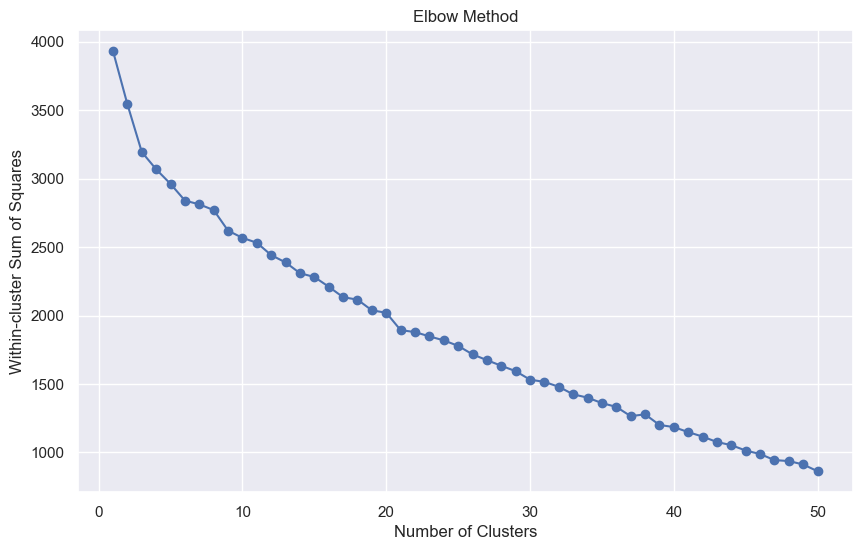

    Difference in SS
1                NaN
2        -387.929464
3        -348.219815
4        -126.231315
5        -106.668261
6        -121.484731
7         -27.720167
8         -41.619414
9        -150.527874
10        -52.392553
11        -35.858653
12        -90.212315
13        -53.396800
14        -78.584915
15        -27.745354
16        -71.009150
17        -76.516519
18        -17.848539
19        -78.095649
20        -17.582246
21       -126.992046
22        -14.075344
23        -31.633063
24        -28.986064
25        -40.231142
26        -61.865381
27        -42.493898
28        -40.833956
29        -39.619345
30        -62.057666
31        -16.110368
32        -35.828303
33        -55.093716
34        -24.090744
35        -39.836235
36        -27.725362
37        -67.746307
38         13.464656
39        -77.751683
40        -15.410895
41        -36.727514
42        -32.758566
43        -39.710766
44        -22.831961
45        -39.425487
46        -25.366571
47        -44

In [23]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), sum_of_sq, marker='o', linestyle='-', color='b')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-cluster Sum of Squares")
plt.grid(True)
plt.show()

# Display differences in sum of squares to help determine optimal clusters
df_ss_diff = pd.DataFrame(sum_of_sq, columns=['Difference in SS'], index=range(1, 51)).diff()
print(df_ss_diff)


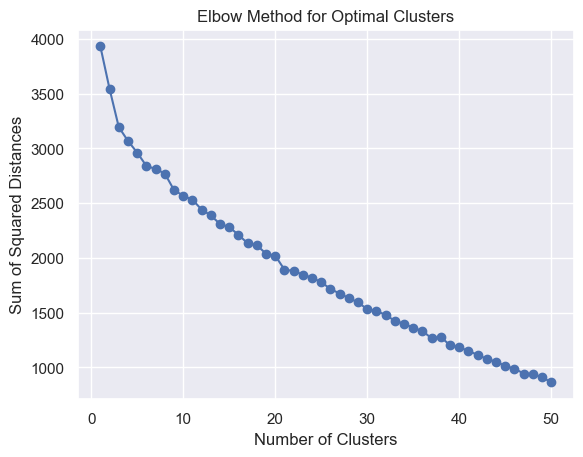

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(1, 51), sum_of_sq, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


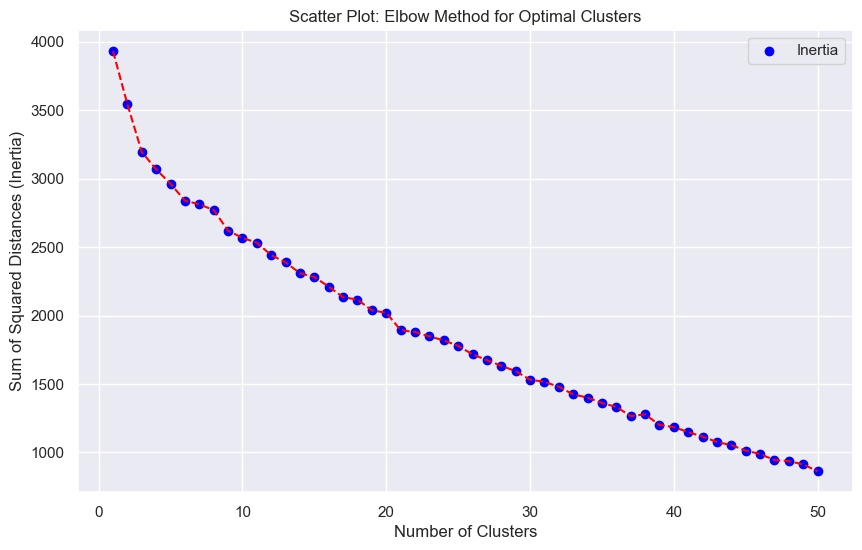

In [25]:
import matplotlib.pyplot as plt

# Scatter plot for Sum of Squared Distances (Inertia)
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 51), sum_of_sq, c='blue', label='Inertia')
plt.plot(range(1, 51), sum_of_sq, linestyle='--', color='red')  # Optional line for trend
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Scatter Plot: Elbow Method for Optimal Clusters')
plt.grid(True)
plt.legend()
plt.show()


In [26]:
gmm = GaussianMixture(n_components = 21)
gmm.fit(transposed.dropna().transpose())

#Predict for each company
clusters = gmm.predict(transposed.dropna().transpose())
clusters_df = pd.DataFrame({'Cluster':clusters,
                           'Companies':transposed.columns})

#Sort by Clusters
clusters_df = clusters_df.sort_values(['Cluster']).reset_index(drop = True)

#Save as csv
clusters_df.to_csv("clusters.csv")
clusters_df = pd.read_csv("clusters.csv", index_col = 0)

C:\Users\karan bansal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
clusters_df

,Cluster,Companies
0,0,AVGO
1,0,TXN
2,0,TGT
3,1,MRK
4,2,TSLA
...,...,...
95,16,TMUS
96,17,INTC
97,18,FDX
98,19,BKNG


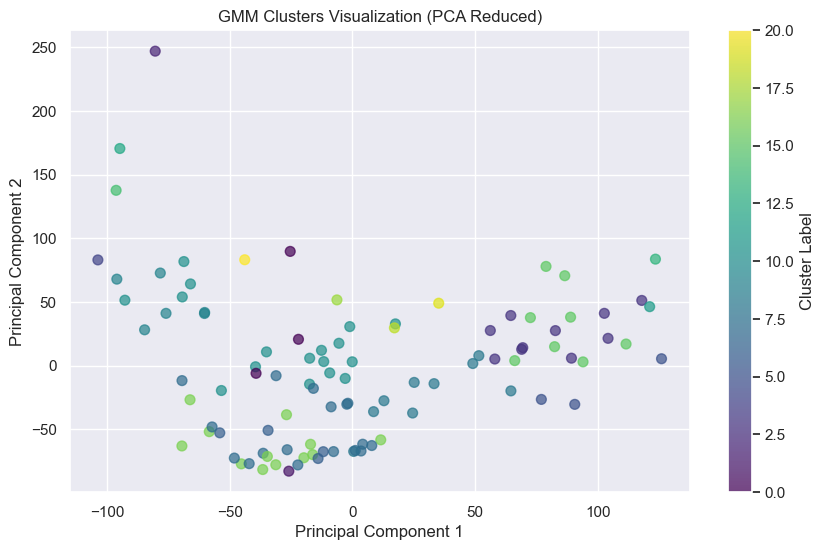

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_scaled = transposed.dropna().transpose()
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.title('GMM Clusters Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


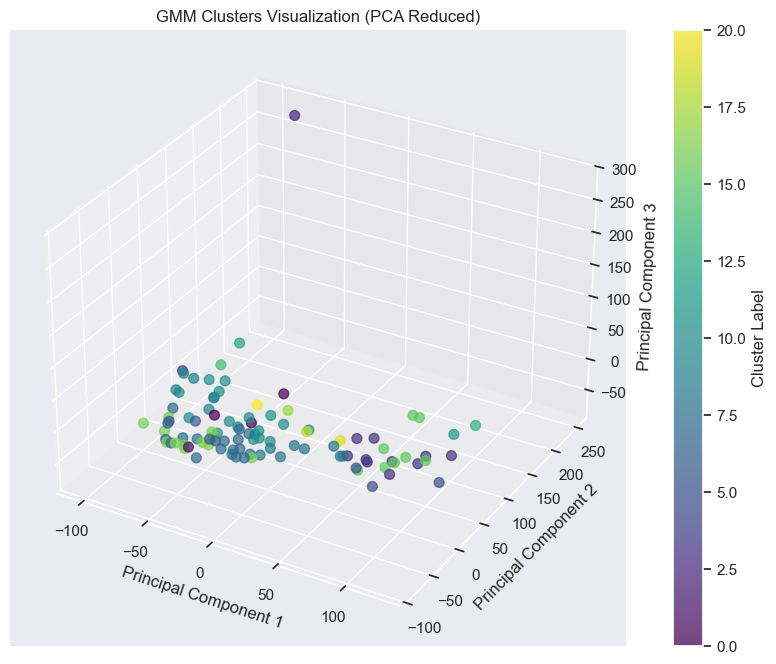

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA to reduce dimensions to 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3D Scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters, cmap='viridis', s=50, alpha=0.7)
ax.set_title('GMM Clusters Visualization (PCA Reduced)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


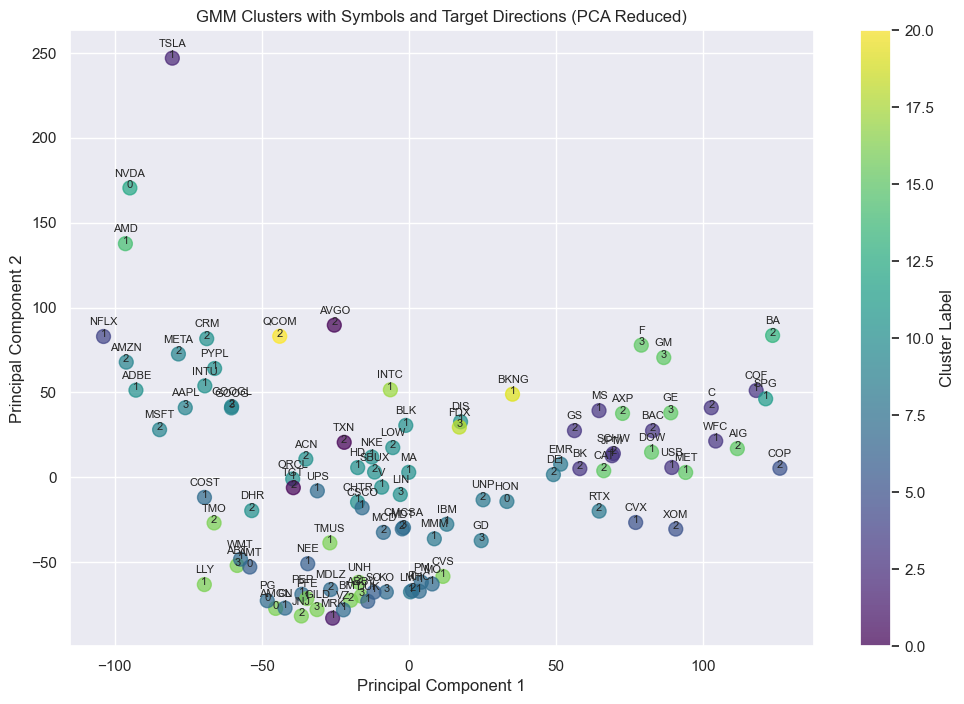

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming transposed.dropna().transpose() is the data
X_scaled = transposed.dropna().transpose()

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get symbols and target directions
symbols = transposed.columns
target_directions = all_data['Target_Direction']  # Replace with actual data

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.title('GMM Clusters with Symbols and Target Directions (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add annotations for symbols and target directions
for i, (symbol, direction) in enumerate(zip(symbols, target_directions)):
    plt.text(X_pca[i, 0], X_pca[i, 1], f'{symbol}\n{direction}', fontsize=8, ha='center')

plt.grid(True)
plt.show()


In [31]:
all_data.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,symbol,Close_Shifted,Rolling_Return,...,avg_15down,RS_5,RS_15,RSI_5,RSI_15,RSI_ratio,5Ewm,15Ewm,MACD,return
0,2004-01-02,0.320548,0.380000,0.388393,0.378214,0.384821,144642400,AAPL,0.423750,0.115132,...,NaN,NaN,NaN,89.762963,74.03045,1.626042,0.380000,0.380000,0.000000,10.116136
1,2004-01-05,0.333954,0.395893,0.399821,0.382500,0.382500,395018400,AAPL,0.430714,0.087956,...,NaN,NaN,NaN,89.762963,74.03045,1.626042,0.385298,0.381987,-0.003311,12.604972
2,2004-01-06,0.332749,0.394464,0.400357,0.387679,0.397321,509348000,AAPL,0.432143,0.095520,...,NaN,NaN,NaN,89.762963,74.03045,1.626042,0.388353,0.383546,-0.004807,8.764203
3,2004-01-07,0.340281,0.403393,0.407679,0.391607,0.394643,586874400,AAPL,0.408036,0.011510,...,NaN,NaN,NaN,89.762963,74.03045,1.626042,0.393366,0.386027,-0.007339,3.393696
4,2004-01-08,0.351880,0.417143,0.423750,0.404464,0.407857,460303200,AAPL,0.405714,-0.027398,...,NaN,NaN,NaN,89.762963,74.03045,1.626042,0.401292,0.389917,-0.011375,-0.525428


In [44]:

all_data.set_index('Date', inplace=True)

In [45]:
all_data

Price,Adj Close,Close,High,Low,Open,Volume,symbol,Close_Shifted,Rolling_Return,Target_Direction,...,avg_15down,RS_5,RS_15,RSI_5,RSI_15,RSI_ratio,5Ewm,15Ewm,MACD,return
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0.320548,0.380000,0.388393,0.378214,0.384821,144642400,AAPL,0.423750,0.115132,3,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,0.380000,0.380000,0.000000,10.116136
2004-01-05,0.333954,0.395893,0.399821,0.382500,0.382500,395018400,AAPL,0.430714,0.087956,3,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,0.385298,0.381987,-0.003311,12.604972
2004-01-06,0.332749,0.394464,0.400357,0.387679,0.397321,509348000,AAPL,0.432143,0.095520,3,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,0.388353,0.383546,-0.004807,8.764203
2004-01-07,0.340281,0.403393,0.407679,0.391607,0.394643,586874400,AAPL,0.408036,0.011510,2,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,0.393366,0.386027,-0.007339,3.393696
2004-01-08,0.351880,0.417143,0.423750,0.404464,0.407857,460303200,AAPL,0.405714,-0.027398,1,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,0.401292,0.389917,-0.011375,-0.525428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-04,114.279999,114.279999,117.550003,113.860001,117.500000,19520600,XOM,111.820000,-0.021526,2,...,0.786000,0.075187,0.485157,14.955318,32.667050,0.361487,116.869093,118.475328,1.372792,-4.834043
2024-12-05,114.779999,114.779999,115.620003,114.059998,114.709999,15751200,XOM,110.839996,-0.034327,1,...,0.786000,0.217390,0.432570,17.857058,31.512608,0.591384,116.172729,118.013412,1.372792,-3.373727
2024-12-06,113.570000,113.570000,114.769997,113.500000,114.540001,16171100,XOM,108.470001,-0.044906,1,...,0.806000,0.102250,0.421836,14.955318,31.512608,0.361487,115.305152,117.457985,1.372792,-5.299458


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import optuna
import matplotlib.pyplot as plt

# Step 1: Load and prepare data
# Replace 'all_data', 'Target_variables', and 'Target_Direction' with actual column names
X = all_data[Target_variables]  # Feature columns
y = all_data[["Target_Direction"]]  # Target column

# Ensure indexes are datetime and sort data
X.index = pd.to_datetime(X.index)
y.index = pd.to_datetime(y.index)
X = X.sort_index()
y = y.sort_index()

# Align the indexes of X and y
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Split into training and testing sets
split_date = "2020-01-01"  # Adjust this based on your data
X_train = X[:split_date]
X_test = X[split_date:]
y_train = y[:split_date]
y_test = y[split_date:]

# Step 2: Define the Optuna objective function
def objective(trial):
    # Define the hyperparameter space
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 10),
        "random_state": 42,
    }
    
    # Create the XGBoost classifier
    xgb = XGBClassifier(**param, use_label_encoder=False, eval_metric="logloss")
    
    # Use TimeSeriesSplit for cross-validation
    cv = TimeSeriesSplit(n_splits=3)
    
    # Perform cross-validation and return the mean accuracy
    scores = cross_val_score(xgb, X_train, y_train.values.ravel(), cv=cv, scoring="accuracy", n_jobs=-1)
    return scores.mean()

# Step 3: Create the Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Adjust n_trials for more or fewer trials

# Step 4: Display the best parameters and their score
print("Best Trial:")
print(f"Value: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# Step 5: Train the final model with the best parameters
best_params = study.best_trial.params
xgb_best = XGBClassifier(**best_params, use_label_encoder=False, eval_metric="logloss")
xgb_best.fit(X_train, y_train.values.ravel())

# Step 6: Evaluate the model on the test set
y_pred = xgb_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Step 7 (Optional): Visualize the optimization history
optuna.visualization.plot_optimization_history(study)
plt.show()

# Plot parameter importance
optuna.visualization.plot_param_importances(study)
plt.show()


[I 2024-12-21 01:18:02,412] A new study created in memory with name: no-name-676610c8-a63a-4037-9dd9-09c232a7c5af
[I 2024-12-21 01:18:32,364] Trial 0 finished with value: 0.5085790790261776 and parameters: {'n_estimators': 117, 'max_depth': 13, 'learning_rate': 0.2729189917668148, 'subsample': 0.7436893718469693, 'colsample_bytree': 0.8905122872960012, 'gamma': 1.2412350088131463}. Best is trial 0 with value: 0.5085790790261776.
[I 2024-12-21 01:18:58,356] Trial 1 finished with value: 0.5331466018391291 and parameters: {'n_estimators': 159, 'max_depth': 14, 'learning_rate': 0.12337933836392709, 'subsample': 0.7775846712348518, 'colsample_bytree': 0.6916825268279652, 'gamma': 3.3421402240776654}. Best is trial 1 with value: 0.5331466018391291.
[I 2024-12-21 01:19:12,575] Trial 2 finished with value: 0.5383398513194518 and parameters: {'n_estimators': 76, 'max_depth': 4, 'learning_rate': 0.033876168418066996, 'subsample': 0.57026119951797, 'colsample_bytree': 0.5213494945124848, 'gamma':

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import optuna
import matplotlib.pyplot as plt

# Step 1: Load and prepare data
# Replace 'all_data', 'Target_variables', and 'Target_Direction' with actual column names
X = all_data[Target_variables]  # Feature columns
y = all_data[["Target_Direction"]]  # Target column

# Ensure indexes are datetime and sort data
X.index = pd.to_datetime(X.index)
y.index = pd.to_datetime(y.index)
X = X.sort_index()
y = y.sort_index()

# Align the indexes of X and y
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Split into training and testing sets
split_date = "2020-01-01"  # Adjust this based on your data
X_train = X[:split_date]
X_test = X[split_date:]
y_train = y[:split_date]
y_test = y[split_date:]

# Step 2: Define the Optuna objective function
def objective(trial):
    # Define the hyperparameter space for XGBoost
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 10),
        "random_state": 42,
        "objective": "multi:softmax",  # Multi-class classification
        "num_class": 4  # Number of classes (0, 1, 2, 3)
    }
    
    # Create the XGBoost classifier with multi-class objective
    xgb = XGBClassifier(**param, use_label_encoder=False, eval_metric="mlogloss")
    
    # Use TimeSeriesSplit for cross-validation
    cv = TimeSeriesSplit(n_splits=3)
    
    # Perform cross-validation and return the mean accuracy
    scores = cross_val_score(xgb, X_train, y_train.values.ravel(), cv=cv, scoring="accuracy", n_jobs=-1)
    return scores.mean()

# Step 3: Create the Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Adjust n_trials for more or fewer trials

# Step 4: Display the best parameters and their score
print("Best Trial:")
print(f"Value: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"    {key}: {value}")

# Step 5: Train the final model with the best parameters
best_params = study.best_trial.params
xgb_best = XGBClassifier(**best_params, use_label_encoder=False, eval_metric="mlogloss")
xgb_best.fit(X_train, y_train.values.ravel())

# Step 6: Evaluate the model on the test set
y_pred = xgb_best.predict(X_test)

# Ensure y_test is a 1D array or Series
y_test_values = y_test.values.ravel()

# Calculate accuracy
accuracy = accuracy_score(y_test_values, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Step 7 (Optional): Visualize the optimization history
optuna.visualization.plot_optimization_history(study)
plt.show()

# Step 8: Plot parameter importance
optuna.visualization.plot_param_importances(study)
plt.show()


[I 2024-12-21 01:21:30,307] A new study created in memory with name: no-name-34c7b2a8-63cd-4652-b4fe-d84803c939d8
[I 2024-12-21 01:22:17,310] Trial 0 finished with value: 0.5242645245393369 and parameters: {'n_estimators': 185, 'max_depth': 10, 'learning_rate': 0.10462272676807595, 'subsample': 0.7058038880581645, 'colsample_bytree': 0.5758070055747265, 'gamma': 0.968042170874307}. Best is trial 0 with value: 0.5242645245393369.
[I 2024-12-21 01:22:38,156] Trial 1 finished with value: 0.5353380544692246 and parameters: {'n_estimators': 156, 'max_depth': 12, 'learning_rate': 0.12623191422856261, 'subsample': 0.9854244942835174, 'colsample_bytree': 0.9831200215629341, 'gamma': 7.41061349470195}. Best is trial 1 with value: 0.5353380544692246.
[I 2024-12-21 01:22:56,416] Trial 2 finished with value: 0.5361061198604798 and parameters: {'n_estimators': 142, 'max_depth': 6, 'learning_rate': 0.1673851851082035, 'subsample': 0.822811575830249, 'colsample_bytree': 0.9708380269308969, 'gamma': 6

Best Trial:
Value: 0.5376175879928126
Params:
    n_estimators: 85
    max_depth: 8
    learning_rate: 0.014270850941016893
    subsample: 0.6749163938353642
    colsample_bytree: 0.6878697841465347
    gamma: 6.74805739022744


C:\Users\karan bansal\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[01:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Test Accuracy: 0.4742


Test Accuracy: 0.4716

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.16      0.00      0.00      7178
     Class 1       0.42      0.21      0.28     51545
     Class 2       0.48      0.82      0.61     58534
     Class 3       0.15      0.00      0.00      7242

    accuracy                           0.47    124499
   macro avg       0.31      0.26      0.22    124499
weighted avg       0.42      0.47      0.40    124499


Confusion Matrix:
[[    5  1991  5178     4]
 [    7 10717 40776    45]
 [   17 10509 47973    35]
 [    2  2012  5213    15]]


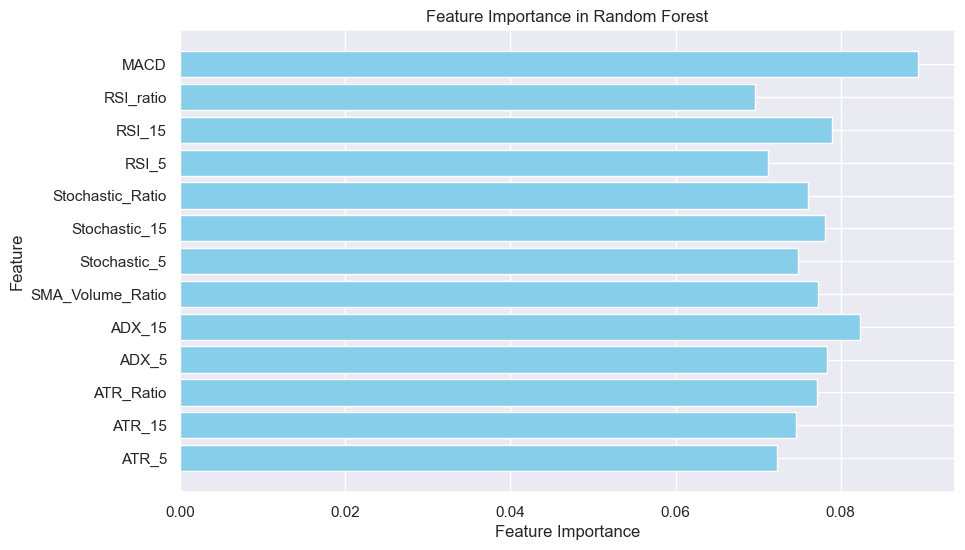

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Step 1: Load and prepare data
# Replace 'all_data', 'Target_variables', and 'Target_Direction' with actual column names
X = all_data[Target_variables]  # Feature columns
y = all_data[["Target_Direction"]]  # Target column

# Ensure indexes are datetime and sort data
X.index = pd.to_datetime(X.index)
y.index = pd.to_datetime(y.index)
X = X.sort_index()
y = y.sort_index()

# Align the indexes of X and y
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Split into training and testing sets
split_date = "2020-01-01"  # Adjust this based on your data
X_train = X[:split_date]
X_test = X[split_date:]
y_train = y[:split_date]
y_test = y[split_date:]

# Step 2: Define the Random Forest model with fixed hyperparameters
rf = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=20,           # Maximum depth of each tree
    min_samples_split=5,    # Minimum samples required to split an internal node
    min_samples_leaf=2,     # Minimum samples required to be at a leaf node
    max_features="sqrt",    # Number of features to consider when looking for the best split
    bootstrap=True,         # Whether bootstrap samples are used when building trees
    random_state=42         # Seed for reproducibility
)

# Step 3: Train the model
rf.fit(X_train, y_train.values.ravel())

# Step 4: Evaluate the model on the test set
y_pred = rf.predict(X_test)

# Ensure y_test is a 1D array or Series
y_test_values = y_test.values.ravel()

# Calculate accuracy
accuracy = accuracy_score(y_test_values, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_values, y_pred, target_names=["Class 0", "Class 1", "Class 2", "Class 3"]))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_values, y_pred))

# Optional: Visualize feature importance
feature_importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()


In [51]:
all_data

Price,Adj Close,Close,High,Low,Open,Volume,symbol,Close_Shifted,Rolling_Return,Target_Direction,...,avg_15down,RS_5,RS_15,RSI_5,RSI_15,RSI_ratio,5Ewm,15Ewm,MACD,return
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,0.320548,0.380000,0.388393,0.378214,0.384821,144642400,AAPL,0.423750,0.115132,3,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,0.380000,0.380000,0.000000,10.116136
2004-01-05,0.333954,0.395893,0.399821,0.382500,0.382500,395018400,AAPL,0.430714,0.087956,3,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,0.385298,0.381987,-0.003311,12.604972
2004-01-06,0.332749,0.394464,0.400357,0.387679,0.397321,509348000,AAPL,0.432143,0.095520,3,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,0.388353,0.383546,-0.004807,8.764203
2004-01-07,0.340281,0.403393,0.407679,0.391607,0.394643,586874400,AAPL,0.408036,0.011510,2,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,0.393366,0.386027,-0.007339,3.393696
2004-01-08,0.351880,0.417143,0.423750,0.404464,0.407857,460303200,AAPL,0.405714,-0.027398,1,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,0.401292,0.389917,-0.011375,-0.525428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-04,114.279999,114.279999,117.550003,113.860001,117.500000,19520600,XOM,111.820000,-0.021526,2,...,0.786000,0.075187,0.485157,14.955318,32.667050,0.361487,116.869093,118.475328,1.372792,-4.834043
2024-12-05,114.779999,114.779999,115.620003,114.059998,114.709999,15751200,XOM,110.839996,-0.034327,1,...,0.786000,0.217390,0.432570,17.857058,31.512608,0.591384,116.172729,118.013412,1.372792,-3.373727
2024-12-06,113.570000,113.570000,114.769997,113.500000,114.540001,16171100,XOM,108.470001,-0.044906,1,...,0.806000,0.102250,0.421836,14.955318,31.512608,0.361487,115.305152,117.457985,1.372792,-5.299458


X_train shape: (378440, 13)
y_train shape: (378440, 1)
X_test shape: (124499, 13)
y_test shape: (124499, 1)


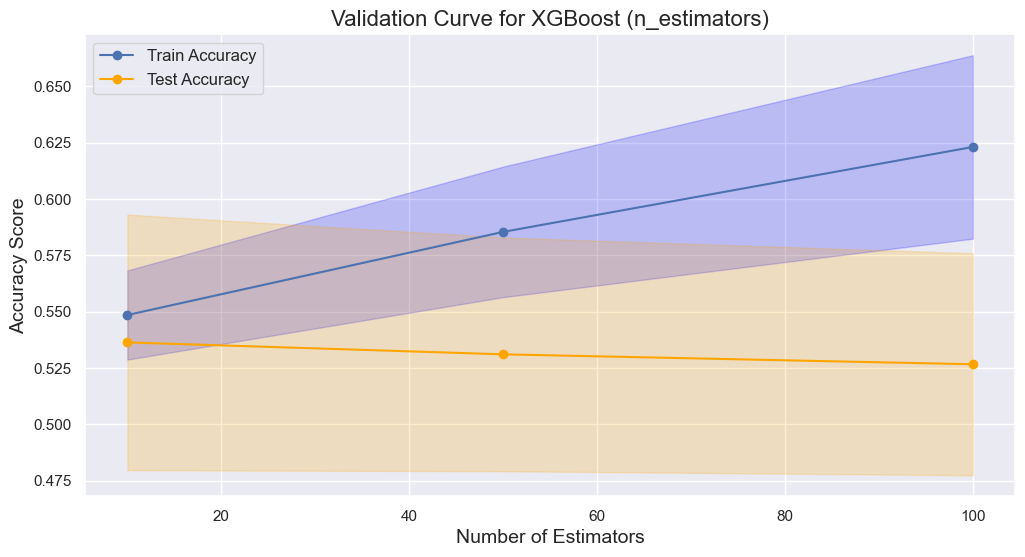

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, validation_curve, TimeSeriesSplit
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Step 1: Prepare the data
X = all_data[Target_variables]  # Replace with actual feature column names
y = all_data[["Target_Direction"]]  # Replace with actual target column name

# Ensure indexes are datetime and sort data
X.index = pd.to_datetime(X.index)
y.index = pd.to_datetime(y.index)
X = X.sort_index()
y = y.sort_index()

# Align the indexes of X and y
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Step 2: Split the dataset
split_date = "2020-01-01"  # Adjust this based on your data
X_train = X[:split_date]
X_test = X[split_date:]
y_train = y[:split_date]
y_test = y[split_date:]

# Verify shapes of datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Step 3: Train XGBoost Classifier and Validation Curve
xgb = XGBClassifier(
    objective="multi:softmax",  # Multi-class classification
    num_class=4,               # Number of classes (0, 1, 2, 3)
    random_state=42,
    eval_metric="mlogloss",    # Multi-class log loss
    use_label_encoder=False
)
param_range = [10, 50, 100]  # Values for n_estimators

# Compute validation curve
train_scores, test_scores = validation_curve(
    xgb,
    X=X_train,
    y=y_train.values.ravel(),  # Flatten target to 1D array
    param_name="n_estimators",
    param_range=param_range,
    cv=TimeSeriesSplit(n_splits=3),
    scoring="accuracy",
    n_jobs=-1,
)

# Step 4: Plot the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(param_range, train_scores_mean, label="Train Accuracy", marker="o")
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.2, color="blue")

plt.plot(param_range, test_scores_mean, label="Test Accuracy", marker="o", color="orange")
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.2, color="orange")

plt.title("Validation Curve for XGBoost (n_estimators)", fontsize=16)
plt.xlabel("Number of Estimators", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [55]:
Target_variabl = ['ADX_5','ADX_15','SMA_Volume_Ratio','Stochastic_5','Stochastic_15','Stochastic_Ratio',
                      'RSI_5','RSI_15','RSI_ratio','MACD']

X_train shape: (378440, 10)
y_train shape: (378440, 1)
X_test shape: (124499, 10)
y_test shape: (124499, 1)


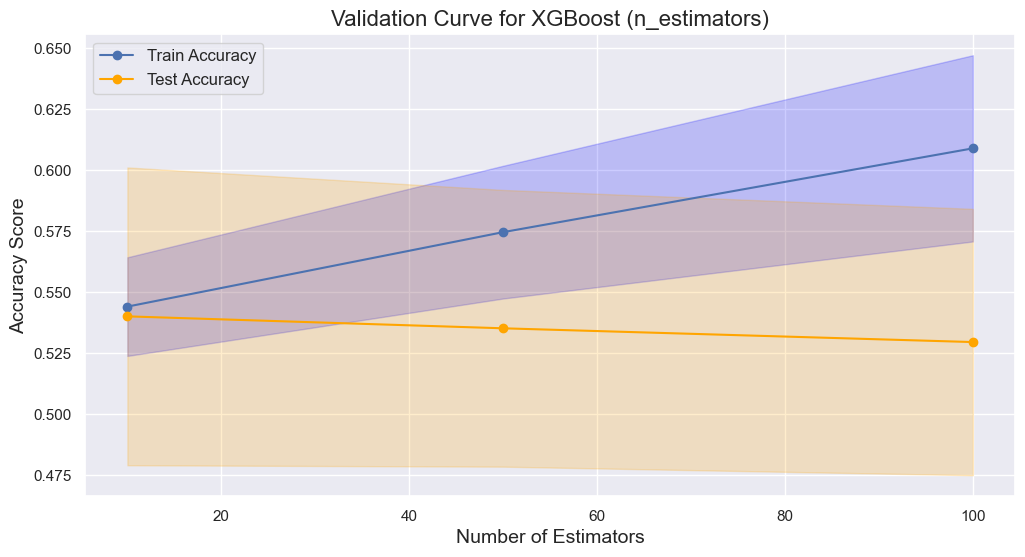

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, validation_curve, TimeSeriesSplit
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Step 1: Prepare the data
X = all_data[Target_variabl]  # Replace with actual feature column names
y = all_data[["Target_Direction"]]  # Replace with actual target column name

# Ensure indexes are datetime and sort data
X.index = pd.to_datetime(X.index)
y.index = pd.to_datetime(y.index)
X = X.sort_index()
y = y.sort_index()

# Align the indexes of X and y
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Step 2: Split the dataset
split_date = "2020-01-01"  # Adjust this based on your data
X_train = X[:split_date]
X_test = X[split_date:]
y_train = y[:split_date]
y_test = y[split_date:]

# Verify shapes of datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Step 3: Train XGBoost Classifier and Validation Curve
xgb = XGBClassifier(
    objective="multi:softmax",  # Multi-class classification
    num_class=4,               # Number of classes (0, 1, 2, 3)
    random_state=42,
    eval_metric="mlogloss",    # Multi-class log loss
    use_label_encoder=False
)
param_range = [10, 50, 100]  # Values for n_estimators

# Compute validation curve
train_scores, test_scores = validation_curve(
    xgb,
    X=X_train,
    y=y_train.values.ravel(),  # Flatten target to 1D array
    param_name="n_estimators",
    param_range=param_range,
    cv=TimeSeriesSplit(n_splits=3),
    scoring="accuracy",
    n_jobs=-1,
)

# Step 4: Plot the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(param_range, train_scores_mean, label="Train Accuracy", marker="o")
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.2, color="blue")

plt.plot(param_range, test_scores_mean, label="Test Accuracy", marker="o", color="orange")
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.2, color="orange")

plt.title("Validation Curve for XGBoost (n_estimators)", fontsize=16)
plt.xlabel("Number of Estimators", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [57]:
from sklearn.metrics import classification_report

# Step 5: Train the model with the best parameter (e.g., n_estimators=50)
best_n_estimators = 50  # Replace with the value identified as best from validation curve
xgb_final = XGBClassifier(
    objective="multi:softmax",  # Multi-class classification
    num_class=4,               # Number of classes (0, 1, 2, 3)
    random_state=42,
    eval_metric="mlogloss",
    use_label_encoder=False,
    n_estimators=best_n_estimators
)

# Fit the model
xgb_final.fit(X_train, y_train.values.ravel())

# Step 6: Make predictions on the test set
y_pred = xgb_final.predict(X_test)

# Step 7: Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


C:\Users\karan bansal\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[02:21:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.00      0.00      7178
           1       0.43      0.14      0.21     51545
           2       0.48      0.89      0.62     58534
           3       0.17      0.00      0.00      7242

    accuracy                           0.47    124499
   macro avg       0.28      0.26      0.21    124499
weighted avg       0.42      0.47      0.38    124499



Text(0.5, 1.0, 'Validation Curve Score for n_estimators')

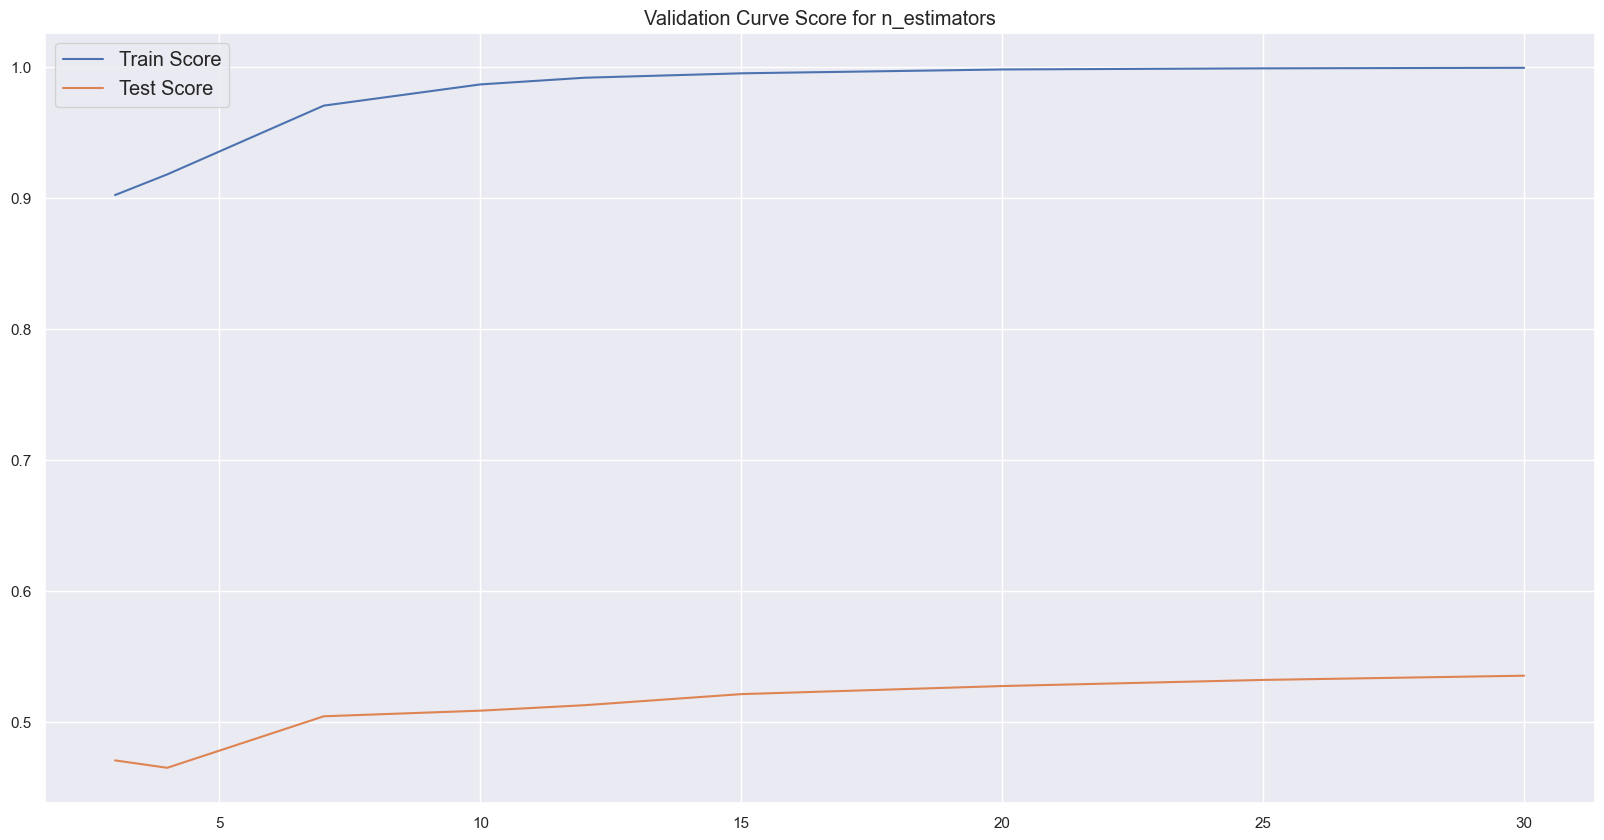

In [68]:
# Step 1: Prepare the data
X = all_data[Target_variabl]  # Replace with actual feature column names
y = all_data[["Target_Direction"]]  # Replace with actual target column name

# Ensure indexes are datetime and sort data
X.index = pd.to_datetime(X.index)
y.index = pd.to_datetime(y.index)
X = X.sort_index()
y = y.sort_index()

# Align the indexes of X and y
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Step 2: Split the dataset
split_date = "2020-01-01"  # Adjust this based on your data
X_train = X[:split_date]
X_test = X[split_date:]
Y_train = y[:split_date]
Y_test = y[split_date:]

#Create validation curve for the Random Forest Classifier
rf = RandomForestClassifier()
train_scoreNum, test_scoreNum = validation_curve(rf,
                                X = X_train['2010-01-01':], y = Y_train.loc['2010-01-01':,'Target_Direction'], 
                                param_name = 'n_estimators', 
                                param_range = [3,4,7,10,12,15,20,25,30], cv = TimeSeriesSplit(n_splits = 3))

train_scores_mean = np.mean(train_scoreNum, axis=1)
train_scores_std = np.std(train_scoreNum, axis=1)
test_scores_mean = np.mean(test_scoreNum, axis=1)
test_scores_std = np.std(test_scoreNum, axis=1)

plt.figure(figsize = (20,10))
plt.plot([3,4,7,10,12,15,20,25,30],train_scores_mean)
plt.plot([3,4,7,10,12,15,20,25,30],test_scores_mean)
plt.legend(['Train Score','Test Score'], fontsize = 'large')
plt.title('Validation Curve Score for n_estimators', fontsize = 'large')

In [70]:
# Run the loop for every unique cluster - 17 loops
for cluster_selected in clusters_df.Cluster.unique():
    print(f'The current cluster running is: {cluster_selected}')
    
    # Get data for that cluster
    co_data = all_data[
        all_data.symbol.isin(clusters_df.loc[clusters_df.Cluster == cluster_selected, 'Companies'].tolist())
    ].copy()
    
    # Ensure the index is a datetime type and sorted
    co_data.index = pd.to_datetime(co_data.index)
    co_data = co_data.sort_index()
    
    # Select training data up to 2020-12-31
    co_train = co_data[:'2020-12-31']
    co_train = co_train.dropna().copy()
    
    # Define features and target
    X_train = co_train.loc[:, Target_variables]
    Y_train = co_train.loc[:, ['Target_Direction']]

    # Define parameters from Validation Curve
    params = {
        'max_depth': [5, 7],
        'max_features': ['sqrt'],
        'min_samples_leaf': [10, 15, 20],
        'n_estimators': [5, 7, 9],
        'min_samples_split': [20, 25, 30],
    }
    
    rf = RandomForestClassifier()

    # Perform a TimeSeriesSplit on the dataset
    time_series_split = TimeSeriesSplit(n_splits=3)
    
    # Run GridSearchCV
    rf_cv = GridSearchCV(rf, params, cv=time_series_split, n_jobs=-1, verbose=20)
    
    # Fit the Random Forest with X_train and Y_train
    rf_cv.fit(X_train, Y_train.values.ravel())
          
    # Save the fitted variable into a Pickle file
    file_loc = f'{os.getcwd()}\\Pickle_Files\\Cluster_{cluster_selected}.pkl'
    os.makedirs(os.path.dirname(file_loc), exist_ok=True)  # Ensure directory exists
    pickle.dump(rf_cv, open(file_loc, 'wb'))
    print(f"Model for Cluster {cluster_selected} saved at {file_loc}")


The current cluster running is: 0
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Model for Cluster 0 saved at C:\Users\karan bansal\Desktop\Returns Finance Project\Pickle_Files\Cluster_0.pkl
The current cluster running is: 1
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Model for Cluster 1 saved at C:\Users\karan bansal\Desktop\Returns Finance Project\Pickle_Files\Cluster_1.pkl
The current cluster running is: 2
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Model for Cluster 2 saved at C:\Users\karan bansal\Desktop\Returns Finance Project\Pickle_Files\Cluster_2.pkl
The current cluster running is: 3
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Model for Cluster 3 saved at C:\Users\karan bansal\Desktop\Returns Finance Project\Pickle_Files\Cluster_3.pkl
The current cluster running is: 4
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Model for Cluster 4 saved at C:\Users\karan bansal\Desktop\Returns Finance Proje

In [73]:
co_data

Price,Adj Close,Close,High,Low,Open,Volume,symbol,Close_Shifted,Rolling_Return,Target_Direction,...,avg_15down,RS_5,RS_15,RSI_5,RSI_15,RSI_ratio,5Ewm,15Ewm,MACD,return
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,17.087357,26.809999,27.495001,26.665001,27.010000,13705000,QCOM,30.045000,0.120664,3,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,26.809999,26.809999,0.000000,11.236578
2004-01-05,17.447451,27.375000,27.445000,26.709999,26.750000,15907200,QCOM,29.719999,0.085662,3,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,26.998333,26.880625,-0.117708,11.102801
2004-01-06,17.281748,27.115000,27.415001,26.875000,27.235001,16162600,QCOM,30.055000,0.108427,3,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,27.037222,26.909921,-0.127300,10.354322
2004-01-07,17.769318,27.879999,28.115000,26.965000,27.000000,20298600,QCOM,29.959999,0.074605,3,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,27.318148,27.031181,-0.286967,10.962960
2004-01-08,18.785891,29.475000,29.715000,28.480000,28.629999,38061600,QCOM,29.834999,0.012214,2,...,NaN,NaN,NaN,89.762963,74.030450,1.626042,28.037099,27.336659,-0.700440,4.208872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-05,160.389999,160.389999,164.449997,159.929993,162.589996,7279800,QCOM,158.529999,-0.011597,2,...,1.315334,2.173533,0.998480,68.489379,49.961959,1.370831,161.118713,161.211713,0.093000,-2.497077
2024-12-06,159.509995,159.509995,160.389999,157.240005,160.389999,9918400,QCOM,157.889999,-0.010156,2,...,1.374001,1.228971,0.783600,55.136250,43.933619,1.254990,160.582473,160.998998,0.416525,-1.558701
2024-12-09,160.740005,160.740005,162.929993,157.470001,157.479996,9481200,QCOM,157.919998,-0.017544,2,...,1.142668,0.464955,1.014003,31.738503,50.347632,0.630387,160.634984,160.966624,0.331640,0.279402


In [2]:
# Combine X_test and y_test to form test_data
test_data = X_test.copy()
test_data['Target_Direction'] = y_test  # Add the target column to test_data

# Ensure the index is datetime and sorted
test_data.index = pd.to_datetime(test_data.index, errors='coerce')  # Convert to datetime
test_data = test_data.sort_index()  # Sort by index


NameError: name 'X_test' is not defined

In [91]:
day_data = test_data.loc['2020-01-02']

pred_for_tomorrow = pd.DataFrame({'Date':[],
                                  'company':[],
                                  'prediction':[]})

#Predict each stock using the 2nd January Data
for cluster_selected in clusters_df.Cluster.unique():
    rf_cv =  pickle.load(open(os.getcwd() + f'\\Pickle_Files\\Cluster_{cluster_selected}.pkl', 'rb'))
    best_rf = rf_cv.best_estimator_
    cluster_data = day_data.loc[day_data.symbol.isin(clusters_df.loc[clusters_df.Cluster==cluster_selected,'Companies'].tolist())].copy()
    cluster_data = cluster_data.dropna()
    if (cluster_data.shape[0]>0):
        X_test = cluster_data.loc[:,Target_variables]

        pred_for_tomorrow = pred_for_tomorrow.append(pd.DataFrame({'Date':cluster_data.index,
                                                                   'company':cluster_data['symbol'],
                                                                   'prediction':best_rf.predict_proba(X_test)[:,1]}), ignore_index = True)


AttributeError: 'DataFrame' object has no attribute 'symbol'

In [1]:
import os
import pickle
import pandas as pd

# Verify and set working directory
current_dir = os.getcwd()
expected_dir = "C:\\Users\\karan bansal\\Desktop\\Returns Finance Project"

if current_dir != expected_dir:
    os.chdir(expected_dir)
    print(f"Changed working directory to: {os.getcwd()}")

# Initialize prediction dataframe
pred_for_tomorrow = pd.DataFrame({'Date': [], 'company': [], 'prediction': []})

# Load required data
try:
    day_data = test_data.loc['2020-01-02'] # Replace with your file path
    clusters_df = pd.read_csv('path_to_clusters.csv')  # Replace with your file path
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Debugging: Check data structure
print(f"day_data shape: {day_data.shape}")
print(f"day_data columns: {day_data.columns}")
print(f"clusters_df shape: {clusters_df.shape}")
print(f"clusters_df columns: {clusters_df.columns}")

# Ensure the necessary columns exist
required_columns_day_data = ['Symbol']  # Update based on the actual column name
required_columns_clusters = ['Cluster', 'Companies']

for col in required_columns_day_data:
    if col not in day_data.columns:
        raise ValueError(f"Missing required column in day_data: {col}")

for col in required_columns_clusters:
    if col not in clusters_df.columns:
        raise ValueError(f"Missing required column in clusters_df: {col}")

# Standardize column names if needed
day_data.rename(columns=lambda x: x.strip().lower(), inplace=True)
clusters_df.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Loop through each cluster
for cluster_selected in clusters_df.cluster.unique():
    # Construct file path
    pickle_file_path = os.path.join(os.getcwd(), "Pickle_Files", f"Cluster_{cluster_selected}.pkl")
    print(f"Processing Cluster: {cluster_selected}, Path: {pickle_file_path}")
    
    # Check if the file exists
    if not os.path.exists(pickle_file_path):
        print(f"File not found: {pickle_file_path}. Skipping this cluster.")
        continue

    # Load the pickle file
    with open(pickle_file_path, 'rb') as file:
        rf_cv = pickle.load(file)
    best_rf = rf_cv.best_estimator_

    # Get cluster-specific data
    cluster_data = day_data.loc[
        day_data['symbol'].isin(clusters_df.loc[clusters_df.cluster == cluster_selected, 'companies'].tolist())
    ].copy()
    cluster_data = cluster_data.dropna()

    # Predict only if there is valid data
    if cluster_data.shape[0] > 0:
        # Ensure target variables exist in the data
        target_variables = ['feature1', 'feature2', 'feature3']  # Replace with your actual features
        missing_features = [var for var in target_variables if var not in cluster_data.columns]
        if missing_features:
            print(f"Missing features for cluster {cluster_selected}: {missing_features}. Skipping this cluster.")
            continue

        X_test = cluster_data.loc[:, target_variables]
        cluster_predictions = pd.DataFrame({
            'Date': cluster_data.index,
            'company': cluster_data['symbol'],
            'prediction': best_rf.predict_proba(X_test)[:, 1]
        })
        pred_for_tomorrow = pd.concat([pred_for_tomorrow, cluster_predictions], ignore_index=True)

# Display predictions
print(pred_for_tomorrow)


NameError: name 'test_data' is not defined

NameError: name 'all_data' is not defined